In [1319]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


from flame_net.lib_uti import count_learnable_params
from flame_net.libSiva import CSolverSiva
#from flame_net.uti_plot import *
import os

from flame_net.libSiva import libSiva
from flame_net.libData import libData



%matplotlib inline
import pickle

#np.random.seed(seed=1653)


In [1320]:
from fractions import Fraction

In [1321]:
device = torch.device('cuda')
bRNN=False
T_in=1
data_channel = 1 # model.data_channel


In [1322]:
models=[
  {'alias':'pFNO*','para_name':'Lpi_rho','para_list':[], 'model_name_detail':'p2FNO_m128w30Lpi_rho10_0_40_1_share_o20','nStep':1,'Tout':20,},
  {'alias':'pFNO','para_name':'Lpi_rho','para_list':[], 'model_name_detail':'p2FNO_m128w30Lpi_rho10_0_40_1EDOM5_share_o20','nStep':1,'Tout':20,} ,
  {'alias':'pCNN40','para_name':'Lpi_rho','para_list':[], 'model_name_detail':'p2Conv_Lpi_rho40_0_40_1d6_inception_less_nonlinearall_delay_ln_o20','nStep':1,'Tout':20,},
  {'alias':'pCNN10','para_name':'Lpi_rho','para_list':[], 'model_name_detail':'p2Conv_Lpi_rho10_0_10_1d6_inception_less_nonlinearall_delay_ln_o20','nStep':1,'Tout':20,},
#  {'alias':'pCNN','para_name':'Lpi_rho','para_list':[], 'model_name_detail':'p2Conv_Lpi_rho10_0_40_1d6_inception_less_nonlinearall_delay_ln_o20','nStep':1,'Tout':20,},
]

In [1323]:
#models[0]={'alias':'pCNN','para_name':'Lpi_rho','para_list':[], 'model_name_detail':'p2Conv_Lpi_rho10_0_40_1d6_inception_less_nonlinearall_delay_ln_o20','nStep':1,'Tout':20,}
#models[0]={'alias':'pCNN','para_name':'Lpi_rho','para_list':[], 'model_name_detail':'fcD50or1_p2Conv_Lpi_rho10_0_40_1d6_inception_less_nonlinearall_delay_pathnum2_ln_o20_ep700','nStep':1,'Tout':20,}


In [1324]:
#models[2]={'alias':'pFNO','para_name':'Lpi_rho','para_list':[], 'model_name_detail':'p2FNO_m128w30Lpi_rho10_0_40_1EDOM5_share_o20_ep900','nStep':1,'Tout':20,}
#models[3]={'alias':'pCNN40','para_name':'Lpi_rho','para_list':[], 'model_name_detail':'p2Conv_Lpi_rho40_0_40_1d6_inception_less_nonlinearall_delay_ln_o20','nStep':1,'Tout':20,}#
#models[4]={'alias':'pCNN10','para_name':'Lpi_rho','para_list':[], 'model_name_detail':'p2Conv_Lpi_rho10_0_10_1d6_inception_less_nonlinearall_delay_ln_o20','nStep':1,'Tout':20,}
#models[-1]={'alias':'pCNN10','para_name':'Lpi_rho','para_list':[], 'model_name_detail':'corr_p2Conv_Lpi_rho10_0_10_1d6_inception_less_nonlinearall_delay_ln_o20','nStep':1,'Tout':20,}

In [1325]:
#models[1]

In [1326]:
def load_pkl( m ):
    str_filename = m['model_name_detail'] 
    if str_filename.find('_ep') >=0:         str_filename  = str_filename[ : str_filename.find('_ep') ]
    if str_filename.find('_best')>=0:        str_filename  = str_filename[ : str_filename.find('_best') ]
    open_file=open('./checkpoints/'+str_filename+ 'trainlog.pkl','rb')
    output_dict= pickle.load(open_file)
    open_file.close()
    #return output_dict    
    train_residual = np.array ( [ os for os  in output_dict['list_output_info'] ] )
    return train_residual 
    
def plot_training_resid( m, list_iy=[2,3], ys='log',ix=0):
    train_residual = load_pkl( m)
    line_style = ['r-', 'g-.','b--','k.']
    for idx, y in enumerate(list_iy):
        plt.plot( train_residual[:,ix], train_residual[:,y], line_style[idx])
        #plt.plot( train_residual[:,ix], train_residual[:,y],'b-')
    plt.yscale(ys)
    
    return [ train_residual[:, y ][-1] for  y in list_iy ]

def print_train_info( list_iy=[2,3,1], models=models ):
    for idx, m in enumerate( models):
        train_residual = load_pkl( m)
        #----------------
        if 'ONet' in m['model_name_detail']:            method='ONet'
        elif  'Fourier' in m['model_name_detail']:      method='Fourier'
        elif  'Conv' in m['model_name_detail']:         method='Conv'
        #----------------
        print(idx, method, m['model_name_detail'], m['nStep'] ,m['Tout'],  [ train_residual[:, y ][-1] for  y in list_iy ] ) 

[0.009780228343971466, 0.010088805059094395]

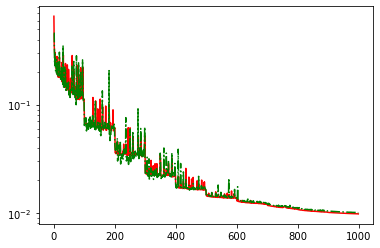

In [1327]:
plot_training_resid (  models[0], [2,3],  ys='log' )

In [1328]:
list__init_str = ['rand_simple','rand_simple','rand_simple','rand_simple','rand_simple','rand_simple' ]
list__init_str_LongTerm=[3]

list_randseed = [33,128,1639,219,78,97]
siva = [
  #{'para_name':'Lpi_rho', 'para_list':[], 'SivaEq':CSolverSiva('MKS_Lpi32_RK4', [0,1], method_default_siva_data_gen=4), 'N':256 ,'list_randseed':list_randseed  },
  {'para_name':'Lpi_rho', 'para_list':[], 'SivaEq':CSolverSiva('MKS_RK4', [[10,0], [40,1]], method_default_siva_data_gen=4), 'N':256 ,'list_randseed':list_randseed  },
]


siva_sys_name= MKS_RK4
N= 256 ,dt_Output= 0.15 ,self.list_para = [[10, 0], [40, 1]] ,

In [1329]:
#models[0]['sys']

In [1330]:
def get_para_key( para_name, each_para_value):  # note: 'each_para_value' is allowed to be a list of values
    if 'Lpi_rho'== para_name: 
        return 'Lpi{:d}rho{:g}_'.format(each_para_value[0],each_para_value[1])
    else:
        return '{}{:.3f}_'.format(para_name, each_para_value)
    

def get_sys(para_dict,siva=siva):
    for sys in siva:
        if para_dict['para_name'] == sys['para_name'] :
            return sys
    raise ValueError('did not find sys')

def get_d0(i_which,sys,each_para_value,list__init_str=list__init_str):
    np.random.seed(seed= sys['list_randseed'][i_which])
    if sys['SivaEq'].siva_sys_name == 'MS_RK4':
        return sys['SivaEq'].get_init_func_from_txt(list__init_str[i_which])( {'siva_sys_name':sys['SivaEq'].siva_sys_name,'para_value':0.025 } )
    else:
        return sys['SivaEq'].get_init_func_from_txt(list__init_str[i_which])( {'siva_sys_name':sys['SivaEq'].siva_sys_name,'para_value':24.0 } )


# def get_d0_from_nu(i_which,nu):
#     return  get_d0(i_which, get_sys(nu) )

def get_d0_all_from_para(sys, each_para_value): # nu
    #sys = get_sys(nu)
    d0_all=[]
    for i_which in range( len(sys['list_randseed']) ): 
        d0 = get_d0(i_which, sys, each_para_value)
        d0_all.append(d0)
    return np.array( d0_all )

def update_sys(sys, para_dict):
    if para_dict['para_name'] != sys['para_name']: assert(False)
    #-----------
    for each_para_value in para_dict['para_list']:
        if each_para_value not in sys['para_list']:
            sys['para_list'].append(each_para_value)
            sys = sys__add_a_single_para(sys, para_dict['para_name'], each_para_value)
    return sys

def sys__add_a_single_para(sys, para_name, each_para_value):
    d0_all   = get_d0_all_from_para( sys, each_para_value ) # ['nu'] )
    
    TotalTimeStep=num_total_step+1
    list_d_an=[]
    # --- init starting from either rand_FFT or rand ---
    for d0 in d0_all:
        d_an = sys['SivaEq'].generate_dsol_single(TotalTimeStep, each_para_value, d0)  # d_an.shape ==numTotalTimeStep,  N
        print('d_an.shape=', d_an.shape)
        list_d_an.append(d_an) 
    
    # --- init starting from a long-term soluton ---
    for i_pick_longterm in list__init_str_LongTerm:
        d0 = list_d_an[i_pick_longterm][-1]
        d_an = sys['SivaEq'].generate_dsol_single(TotalTimeStep, each_para_value, d0) 
        print('d_an.shape=', d_an.shape)
        list_d_an.append(d_an) 
    
    each_para_key = get_para_key(para_name, each_para_value)
    
    sys[each_para_key+'list_d_an'] = np.array( list_d_an)
    sys['x'] = np.linspace(-1,1,sys['N'],endpoint=False)*np.pi 
    sys[each_para_key+'list_NormalizedTotalLen_an'] = libData.dsol_to_whole_length(sys['x'], sys[each_para_key+'list_d_an'])
    
    return sys





In [1331]:
def clean_models(model_alias, para_name , model_name_detail = None, models= models ):
    for m in models:
        if m['alias'] == model_alias and m['para_name']==para_name:
            m['para_list'] = []
            m.pop('model', None )
            if model_name_detail is not None: 
                m['model_name_detail'] = model_name_detail
            return models
    print( 'Did not find model_alias={} para_name={} to clean'.format(model_alias, para_name)   )
    return models

In [1332]:
num_total_step=4000

In [1333]:
def load_model( model_name_detail):
    LocalFull_filename_Saved_Model =  './checkpoints/' + model_name_detail

    model = torch.load( LocalFull_filename_Saved_Model, map_location='cuda')
        
    print(model_name_detail, ' loaded in: count_learnable_params =' + str( count_learnable_params(model) ))
    return model

#def get_model(name, nu,nStep,Tout,models=models, bLoadModel=True):

#             alias_name
def get_model(name, para_name,each_para_value,nStep,Tout, models, bLoadModel=True):
    
    for m in models:
        
#       if name[0] == 'p': 

        if para_name.casefold() != 'dd':
            list_keywords = [ para_name.casefold() ] #, 'npara' ]
        else:
            list_keywords = [ ]
        if m['alias']==name and all( [keyword in m['model_name_detail'].casefold() for keyword in list_keywords ] ) and \
            m['nStep']==nStep and m['Tout']==Tout:

            if 'model' not in m  and bLoadModel==True:
                m['model'] = load_model( m['model_name_detail'] )

                #-- special adjustment to yeild backward compatable with old codes
                if 'fourier' in  m['model_name_detail'].casefold()  and not hasattr(m['model'], 'PDEPara_mode_level')  and 'fourier2' not in  m['model_name_detail'].casefold() :
                    m['model'].PDEPara_mode_level = m['model'].PDEPara_depth 
                    for each_conv in m['model'].conv:
                        each_conv.PDEPara_mode_level = each_conv.PDEPara_depth
                    print('Special treatment for old-version of FNO: add PDEPara_mode_level')

            if each_para_value not in m['para_list']:
                m = update_model_pred(m, {'para_name':para_name,'para_list':[each_para_value] } )
            return m
        
    print( m['model_name_detail'])                
    raise ValueError('did not find model')

def update_model_pred(m, para_dict):
    #if 'model' not in m:
    #m['model'] = load_model( m['model_name_detail'] )

    m = get_model_pred(m, para_dict)
    return m

def get_model_pred(m, para_dict):
    para_name = para_dict['para_name']
    para_list = para_dict['para_list']
    
    nStep = m['nStep']

    #----- Siva system ------
    sys = get_sys(para_dict, siva=siva)
    sys = update_sys(sys, para_dict)
    
    m['sys'] = sys
    m['x'] = sys['x']    
    #----
    NotYetReady__para_list = []
    for each_para_value in para_list:
        if each_para_value not in m['para_list']:
            NotYetReady__para_list.append(each_para_value)
    
    #-----
    for each_para_value in NotYetReady__para_list:
        m['para_list'].append(each_para_value)
        
        #---
        each_para_key = get_para_key(para_name, each_para_value)
        d0=sys[each_para_key+'list_d_an'][:,0,:] 
        d0_torch = torch.tensor(d0,dtype=torch.float).unsqueeze(-1)

        model = m['model']
        model.eval()
        with torch.no_grad():
            xx = d0_torch
            xx = xx.to(device)
            #print('get_model_pred: xx.shape', xx.shape)
            #print('get_model_pred: nu', nu)
            batch_size = xx.shape[0]
            
            pdepara = torch.tile( torch.tensor(each_para_value,dtype=torch.float), (batch_size,1) ).to(device) 
            
            if '_O' in m['model_name_detail']:
                T_out = 20
                for t in range(num_total_step//nStep//T_out):
                    im = model(xx, pdepara   )  
                    #--------------------
                    #print(t, 'im.shape=', im.shape)
                    if t == 0:     pred = torch.cat((xx, im[...,:T_out]), -1)
                    else:          pred = torch.cat((pred, im[...,:T_out]), -1)
                    #xx = im[...,-1:]
                    xx = im[...,T_out-1:]
            else:
                
                #print('debug_test_else', xx) 

                for t in range(num_total_step//nStep):
                    im = model(xx,pdepara  )  
                    #--------------------
                    if t == 0:     pred = torch.cat((xx, im), -1)
                    else:           pred = torch.cat((pred, im), -1)
                    #xx = torch.cat((xx[..., 1 * data_channel:], im), dim=-1)
                    xx = im
    
        list_pred = pred.detach().cpu().numpy()                   # list_pred.shape == (4, 512, 2000)
        
        m[each_para_key+'list_pred'] = np.moveaxis(list_pred,1,-1)

        #m['list_pred'] = np.moveaxis(list_pred,1,-1)
        print(each_para_key+'list_pred.shape=', m[each_para_key+'list_pred'].shape)

        #----
        # nu = m['nu']
        # sys = get_sys(nu)    
        #----
        m[each_para_key+'list_NormalizedTotalLen_pred'] = libData.dsol_to_whole_length(m['x'], m[each_para_key+'list_pred']  )

    return m

In [1334]:
#list_i_t_plot = [0,            50, 125,250,500,750,1000,1250,1500,1750,2000]
#list_i_t_plot = [0,            50*2, 125*2,250*2,500*2,750*2,1000*2,1250*2,1500*2,1750*2,2000*2]
list_i_t_plot = [0,            50, 125,250,500,750,1000,1250,1500,1750,2000]

 

In [1389]:
def plot_disp_long(list_model_alias, para_name, list_para, list_init, nStep, Tout,Tin, png_filename=None,
                   list_i_t_plot= list_i_t_plot ,  models= models  ):
    
    list_lines_style=['-r','-.c', ':b']
    
    if para_name == 'nu' or para_name == 'Lpi_rho':
        R_ratio = 1
    elif para_name == 'dd':
        R_ratio = 0.3
    else: 
        R_ratio = 1.3
        
    
    #---------------------------------------------------------------------------
    nRow_per_init = len(list_init)//2
    figsize=(12, 2.5*len(list_para)* nRow_per_init )
    fig, axs = plt.subplots(   nRow_per_init *len(list_para),  2, sharex=True, sharey=True, figsize= figsize )
 
    list_save__plt_handle = [ None for _ in list_model_alias]
    
    for idx, each_para_value in enumerate( list_para):
        
        m = get_model( list_model_alias[0] , para_name, each_para_value, nStep, Tout,  models= models)
        x = m['x']
        each_para_key = get_para_key(para_name, each_para_value)
        
        
        #for ax, d_an, pred in zip(axs[idx*2:(idx+1)*2,:].reshape(-1), m['sys'][each_para_key+'list_d_an'], m[each_para_key+'list_pred'] ) :
        for ax, i_init in zip(axs[idx*nRow_per_init:(idx+1)*nRow_per_init,:].reshape(-1),   list_init) :
            
            for idx_model, model_alias in enumerate(list_model_alias):
                m = get_model( model_alias, para_name, each_para_value, nStep, Tout ,  models= models)
                
                d_an  =  m['sys'][each_para_key+'list_d_an'][i_init]
                pred  =  m[each_para_key+'list_pred'][i_init]

                for i in list_i_t_plot:
                    d = (i)/100
                    if i > 0: 
                        h_pred, = ax.plot( R_ratio * pred[i] + d,   x, list_lines_style[idx_model] , linewidth=1 )  #, linewidth=1.5 )
                        
                        list_save__plt_handle[idx_model] = h_pred
                    
                    if idx_model == 0:
                        h_ref,  = ax.plot( R_ratio * d_an[i] + d,   x,'--k' , linewidth=1 )

            #---------------------
            ax.set_yticks( [-np.pi, 0, np.pi] ); 
            ax.set_yticklabels(['$-\pi$', '0', '$\pi$'] ,  fontsize=14,rotation='vertical')
            ax.set_ylabel('x', fontsize=14, labelpad=0)

            ax.set_xlim ( [-0.3, 7.2*np.pi ] )
            
            if R_ratio == 1: 
                ax.set_xlabel('$\phi(x,t)+t/15$', fontsize=14 )
            else:
                ax.set_xlabel('${:.1f}\phi(x,t)+t/100$'.format(R_ratio), fontsize=14 )
                
            ax.set_xticks( [ 0,  2*np.pi,  4*np.pi,  6*np.pi ] );    
            ax.set_xticklabels(['0','2$\pi$', '4$\pi$' ,'6$\pi$' ] , fontsize=14 )
            
            
            #----------------
            if i_init==list_init[-1]:
                #ax2 = ax.twinx()
                ax.yaxis.set_label_position("right")
                list_RightText = r'$\beta={:g},\rho={}$'.format( each_para_value[0], Fraction(each_para_value[1]) )
                #print(list_RightText)
                ax.set_ylabel( list_RightText,  fontsize=14  )
                #ax.set_yticks([])              
            #---------------------

            
    for ax in axs.flat:
        ax.label_outer()
    #plt.subplots_adjust(left=0.035, right=0.98, top=0.99, bottom=0.08, wspace=0.02)
    #plt.subplots_adjust(left=0.045, right=0.98, top=0.99, bottom=0.1, wspace=0.02,hspace=0.02)

    list_text_legend = ['Ref']+ [ '$'+model_alias+'$' for model_alias in list_model_alias]
    fig.legend( [h_ref]+list_save__plt_handle, 
                 list_text_legend ,
                bbox_to_anchor=(0.61+ 0.08*(len(list_model_alias)-1) ,0.1/(len(list_para)/2)) , ncol=len(list_model_alias)+1, fontsize=13 )

    fig.tight_layout()
    plt.subplots_adjust(left=0.045, top=0.99, wspace=0.02, hspace=0.02, right=0.985)
    #plt.subplots_adjust(left=0.045, right=0.975, top=0.99,  wspace=0.02, hspace=0.02)

    #fig.text(0.475, 0.005, 'd(x,t)+t/100', ha='center',fontsize=16)
    #fig.text(0.001, 0.52, 'x', va='center', rotation='vertical',fontsize=16 )

    #---------------------

    #fig.text(0.465, 0.001, 't/0.015', ha='center',fontsize=16)
    #fig.text(0.001, 0.52, 'x', va='center', rotation='vertical',fontsize=14 )

    #----
#     if para_name=='Lpi':
#         list_RightText = [ r'$\beta$='+str(each_para_value)   for each_para_value in list_para[::-1]]
#     elif para_name=='nu':
#         list_RightText = [ r'$\nu$='+str(each_para_value)   for each_para_value in list_para[::-1]]
#     elif para_name=='dd':
#         list_RightText = [ r'$\rho$='+str(each_para_value)   for each_para_value in list_para[::-1]]
#     elif para_name=='Lpi_rho':
#         list_RightText = [ r'$\beta={:g},\rho={:g}$'.format( each_para_value[0], each_para_value[1] )   for each_para_value in list_para[::-1]]
        
#     dy =(1-0.05)/(len(list_para)*nRow_per_init)
#     for idx in range(nRow_per_init*len(list_para)):
#         ypos = 0.05+(0.5+idx)*dy
#         fig.text(0.98, ypos, list_RightText[idx//nRow_per_init],  rotation='vertical',fontsize=14 ,transform=plt.gcf().transFigure, verticalalignment='center') #, weight='bold')
    #---------------------
        
    
    if png_filename is not None:
        print('savefig: ', png_filename)
        if 'eps' in png_filename:
            plt.savefig(png_filename, format='eps')
        else:
            plt.savefig(png_filename, dpi=300)
    #return fig,axs

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


savefig:  disp_MKS_beta10.eps


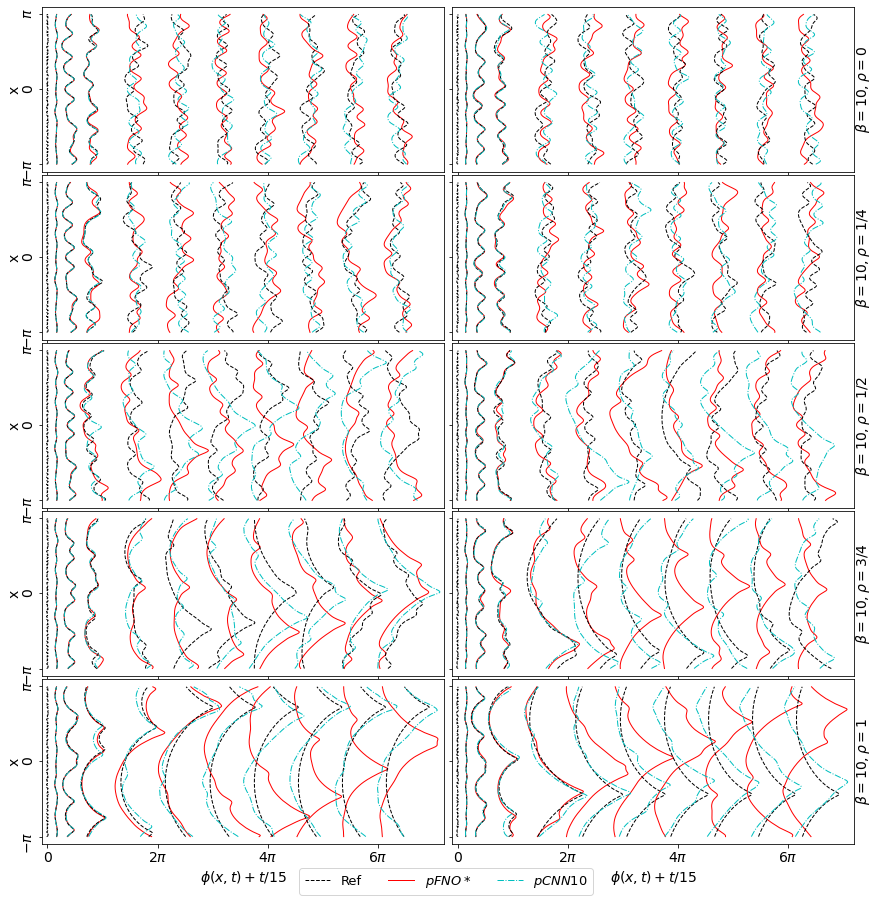

In [1390]:

#list_para_values = [[10, 0], [10, 0.25] ,[10, 0.5] , [10, 0.75], [10, 1]] 
list_para_values = [[10, 0], [10,0.25], [10, 0.5] , [10, 0.75], [10, 1]] 
model_name, para_name, list_para, list_init, nStep, Tout,T_in, png_filename  =['pFNO*','pCNN10'], 'Lpi_rho',list_para_values, [4,1], 1,  20,1, None # 'disp_nu02_fourier_o20_Revision.png'
png_filename =  'disp_MKS_beta10.eps'
#
plot_disp_long(model_name, para_name, list_para, list_init, nStep, Tout, T_in, png_filename ,  models= models, list_i_t_plot=list_i_t_plot )
#

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


savefig:  disp_MKS_beta40.eps


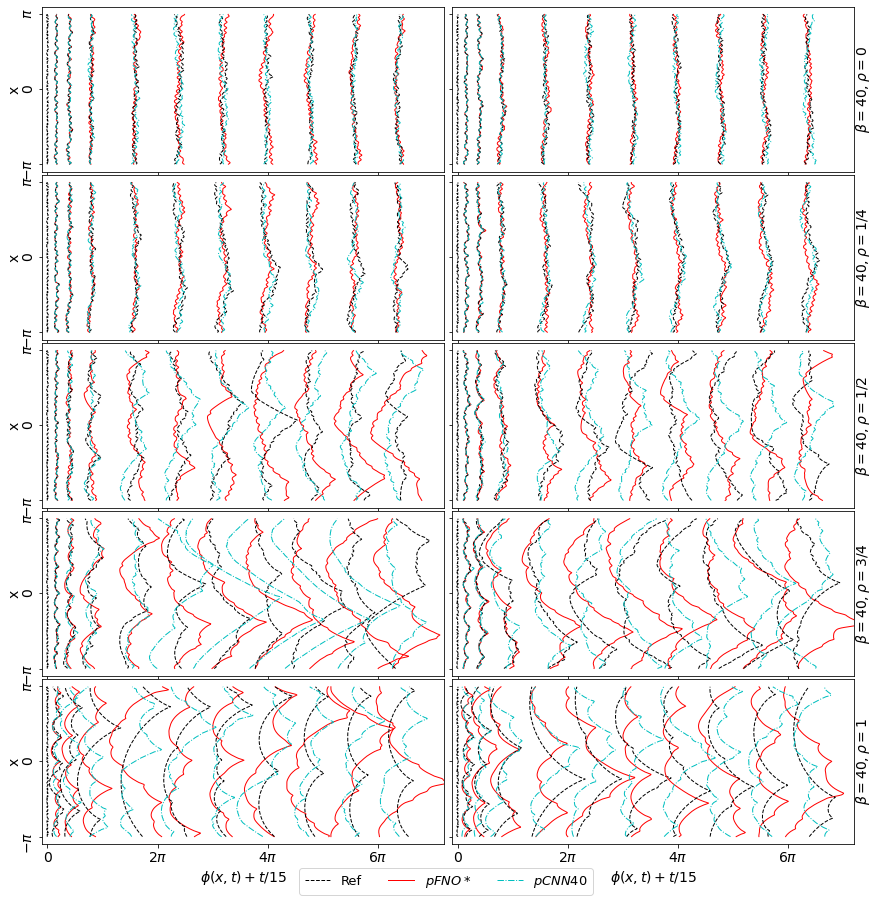

In [1391]:

list_para_values = [[40, 0], [40, 0.25] ,[40, 0.5] , [40, 0.75], [40, 1]] 
#list_para_values = [[40, 0],[40, 0.5] ,  [40, 1]] 
model_name, para_name, list_para, list_init, nStep, Tout,T_in, png_filename  =['pFNO*','pCNN40'], 'Lpi_rho',list_para_values, [0,1], 1,  20,1, None # 'disp_nu02_fourier_o20_Revision.png'
png_filename =  'disp_MKS_beta40.eps'
#
plot_disp_long(model_name, para_name, list_para, list_init, nStep, Tout, T_in, png_filename ,  models= models, list_i_t_plot=list_i_t_plot )


In [1392]:
# def autocorr4(x,lags):
#     '''fft, don't pad 0s, non partial'''
#     mean=x.mean()
#     var=np.var(x)
#     xp=x-mean

#     cf=np.fft.fft(xp)
#     sf=cf.conjugate()*cf
#     corr=np.fft.ifft(sf).real/var/len(x)

#     return corr[:lags]

# def autocorr(x):
#      result = np.correlate(x, x, mode='full')
#      return result[result.shape[0]//2:]

# im=0; j = 100; ipick = 4


# strcolor = 'rbckm'
# fig,axs = plt.subplots(1,2, figsize=(25,8)) 
# for ipick in range(4):
#     x= models[im]['nu0.025_list_pred'][ipick ,j]
#     x_an = models[im]['sys']['nu0.025_list_d_an'][ipick ,j]
#     #axs[0].plot( x )
#     axs[0].plot( autocorr4(x_an,128), '-'+strcolor[ipick] )
#     axs[0].plot( autocorr4(x,128) ,'--'+strcolor[ipick] )


In [1393]:

#models[-1] = update_model_pred(models[-1])


In [1340]:

def plot_short_disp(list_models_for_cmp, list__i_pickplot__init_d0=[0,1,4],
                  shortlist_i_t_plot = [0, 8, 20, 40 ,80],
                  png_filename=None, figsize=None, 
                  linestyle = ['-r',':c','-.g'] ,
                  xlim_set=[ [-1.2, 1.6*np.pi], [-0.1,  0.52*np.pi] ] , models= models):
    
    
    #----------------
    list__nStep_all       =[]
    list__m_all           = []
    list__each_para_key_all=[]
    list__pred_all          =[]
    for models_for_cmp in list_models_for_cmp:
        #-------
        nStep_all = [    m_['nStep'] for m_ in models_for_cmp] 
        m_all     = [ get_model(**m_, models= models) for m_ in models_for_cmp]
        each_para_key_all = [ get_para_key( m_['para_name'], m_['each_para_value']) for m_ in models_for_cmp] 
        pred_all = [ m_[each_para_key+'list_pred'] for m_ , each_para_key in zip(m_all,each_para_key_all) ] 
        #------
        list__nStep_all.append(nStep_all)
        list__m_all.append(m_all) 
        list__each_para_key_all.append(each_para_key_all) 
        list__pred_all.append(pred_all )
    
    #-----------
    str__para_name        = r'$\nu$='  if models_for_cmp[0]['para_name']=='nu' else r'$\mathcal{L}$=' 
    str__para_name_legend = [ str__para_name+str(m['each_para_value'])    for m in models_for_cmp ]
    #----------
    
    
    #----------------
    # nStep_all = [    m_['nStep'] for m_ in models_for_cmp] 
    # m_all     = [ get_model(**m_, models= models) for m_ in models_for_cmp]
    # each_para_key_all = [ get_para_key( m_['para_name'], m_['each_para_value']) for m_ in models_for_cmp] 
    # pred_all = [ m[each_para_key+'list_pred'] for m, each_para_key in zip(m_all,each_para_key_all) ] 
    #---------------        
    x = m_all[0]['x']

        
    #---------------------------------------------------------------------------
    nCols = len(list__i_pickplot__init_d0)
    nRows = len( models_for_cmp )
    if figsize is None:         figsize= [2*nRows,3.5*nCols]

    fig, axs = plt.subplots( nRows, nCols , sharex=False,  figsize= figsize) #sharey=True,
    
    #fig, axs = plt.subplots(1+1+1, 3 , sharex=False, sharey=True, figsize= figsize )

    #pred_allmodes_selectedplot = [ m_['list_pred'][ [1,3,4] ] for m_ in m_all ] 

    

    for icol, ax_cols in enumerate( np.transpose(axs)) :

        i_pickplot = list__i_pickplot__init_d0[icol]
        #-----------
        #d_an     = m_all[0]['sys']['list_d_an'][ i_pickplot ]
        #d_ans     =  [ m['sys'][each_para_key+'list_d_an'][ i_pickplot ]  for m,each_para_key in zip(m_all,each_para_key_all) ] 

        num_models = len(list__pred_all) 
        
        #
        #list__pred_all[num_models][num_paras][num_d0][2000][256]
        #
        
        #----------
        def plot_disp_list_A ( ax, jPara_Row, i_pickplot, list__pred_all=list__pred_all,list__nStep_all=list__nStep_all, list_i_t_plot=shortlist_i_t_plot):
            h_preds = ['' for _ in range( len(list__pred_all) ) ]
            for i in list_i_t_plot:  # [0, 8, 20, 40 ,80],
                if i_pickplot>=4:        d = (i)/30
                else:                    d = (i)/80
                
                for idx in range( num_models ):
                    nStep = list__nStep_all[idx][jPara_Row]
                    if i%nStep==0 and i>0: 
                        i_actual = i//nStep
                        h_preds[idx], = ax.plot(   list__pred_all[idx][jPara_Row][i_pickplot][i_actual] + d,   x, linestyle[idx] ); 
                
                each_para_key = list__each_para_key_all[idx][jPara_Row]
                d_an  =  list__m_all[idx][jPara_Row]['sys'][each_para_key+'list_d_an'][ i_pickplot ] 
                h_ref, = ax.plot(  d_an[i] + d,   x,  '--k' , linewidth=1 )
                
            return [h_ref, *h_preds]
        
        for jPara_Row in range( nRows ) :
            h_s = plot_disp_list_A ( ax_cols[jPara_Row], jPara_Row   ,i_pickplot  ) 
            if icol== nCols-1 and jPara_Row==0: 
                txt_legends = ['Ref']+ [ '$'+models_for_cmp[0]['name']+'$' for models_for_cmp in list_models_for_cmp] 
                ax_cols[0].legend(h_s, txt_legends, fontsize=12)
        
#         #----------
#         pred_pickplot = [ m_pred[ i_pickplot ] for m_pred in pred_all ]
#         def plot_disp_list(ax,list_m_pick, i_pickplot, pred_pickplot=pred_pickplot,d_ans=d_ans,list_i_t_plot=shortlist_i_t_plot,nStep_all=nStep_all):
#             h_preds = ['' for _ in list_m_pick]
#             linesytyle=['-r', '-.g',]
#             for i in list_i_t_plot:
#                 if i_pickplot>=4:        d = (i)/30
#                 else:                    d = (i)/80
                
#                 for idx, m_pick in enumerate(list_m_pick):
#                     nStep = nStep_all[m_pick]
#                     if i%nStep==0 and i>0: # for those with nStep >1
#                         i_actual = i//nStep
#                         h_preds[idx], = ax.plot(  pred_pickplot[m_pick][i_actual]+d,   x, linesytyle[idx] ); 
                        
#                 #h_ref, = ax.plot(  d_an[i] + d,   x,'--k' , linewidth=1 )
#                 h_ref, = ax.plot(  d_ans[ list_m_pick[0] ][i] + d,   x,'--k' , linewidth=1 )
#             return [h_ref, *h_preds]
#         h_s0 = plot_disp_list(ax_cols[0], [ 0, 1] ,i_pickplot )
#         h_s1 = plot_disp_list(ax_cols[1], [ 2, 3] ,i_pickplot )
#         if len(m_all) ==6: h_s2=plot_disp_list(ax_cols[2], [ 4, 5] ,i_pickplot )
#         else:              h_s2=plot_disp_list(ax_cols[2], [ 4   ] ,i_pickplot )
        #----------
        
        # if icol==nCols-1: 
        #     ax_cols[0].legend(h_s0,['Ref', models_for_cmp[0]['name'] ,models_for_cmp[1]['name']], fontsize=12)
        #     ax_cols[1].legend(h_s1,['Ref', models_for_cmp[2]['name'] ,models_for_cmp[3]['name']], fontsize=12)
        #     if len(m_all)==6:
        #         ax_cols[2].legend(h_s2,['Ref', models_for_cmp[4]['name'] ,models_for_cmp[5]['name']], fontsize=12)
        #     else:
        #         ax_cols[2].legend(h_s2,['Ref', models_for_cmp[4]['name'] ] , fontsize=12)
            
        for j ,  ax in enumerate(ax_cols):
            ax.set_yticks( [-np.pi, 0, np.pi] ); 
            ax.set_yticklabels(['$-\pi$', '0', '$\pi$'] ,  fontsize=14,rotation='vertical')
            ax.set_ylabel('x', fontsize=14, labelpad=0)
            if i_pickplot >=4:  
                ax.set_xlim ( xlim_set[0] )
                ax.set_xlabel('d(x,t)+t/30', fontsize=14 )
                ax.set_xticks( [ 0,  np.pi ]); ax.set_xticklabels(['0','$\pi$' ] , fontsize=14 )
            else:
                ax.set_xlim ( xlim_set[1] )
                ax.set_xlabel('d(x,t)+t/80', fontsize=14  )
                ax.set_xticks( [ 0,  np.pi/4]); ax.set_xticklabels(['0','$\pi/4$' ] , fontsize=14 )

            if icol == len(np.transpose(axs))-1:
                #print('len(ax_cols)-1', len(ax_cols)-1)
                #print(icol,str__para_name_legend[icol])
                ax.yaxis.set_label_position("right")
                ax.set_ylabel(str__para_name_legend[j], fontsize=14,labelpad=0.5)

 
    for ax in axs.flat:
        ax.label_outer()

 
        
        
    fig.tight_layout()
    #plt.subplots_adjust(left=0.035, right=0.98, top=0.99, bottom=0.08, wspace=0.02)
    #plt.subplots_adjust(left=0.065, right=0.98, top=0.99, bottom=0.13, wspace=0.05)
    #plt.subplots_adjust(left=0.055, right=0.98, top=0.99, bottom=0.05, wspace=0.02,hspace=0.02)
    plt.subplots_adjust(wspace=0.02,hspace=0.02)

    #--------------
    # para_list = [ each_models['each_para_value'] for each_models in list_models_for_cmp[0]]
    # str__para_name = r'$\nu$='  if list_models_for_cmp[0][0]['para_name']=='nu' else r'$\mathcal{L}$=' 
    # list_RightText = [ str__para_name + str(para)   for para in para_list[::-1]]
    # dy =(1-0.05)/len(para_list) 
    # for idx in range(  len(para_list) ):
    #     ypos = 0.01+(0.5+idx)*dy
    #     fig.text(0.988, ypos, list_RightText[idx ],  rotation='vertical',fontsize=14 ,transform=plt.gcf().transFigure) #, weight='bold')
    #---------------------       

    
    if png_filename is not None:
        plt.savefig(png_filename, dpi=300)
        print('save png: ', png_filename)


In [1341]:
#----------------
# models_for_cmp=[
#     {'name':'pFNO_d','para_name':'nu','each_para_value':0.025, 'nStep':1,'Tout':20},
#     {'name':'pFNO_d','para_name':'nu','each_para_value':0.075, 'nStep':1,'Tout':20},
#     {'name':'pFNO_d','para_name':'nu','each_para_value':0.15, 'nStep':1,'Tout':20},
# ]
# models_for_cmp2=[
#     {'name':'pFNO','para_name':'nu','each_para_value':0.025, 'nStep':1,'Tout':20},
#     {'name':'pFNO','para_name':'nu','each_para_value':0.075, 'nStep':1,'Tout':20},
#     {'name':'pFNO','para_name':'nu','each_para_value':0.15, 'nStep':1,'Tout':20},
# ]
# models_for_cmp3=[
#     {'name':'pCNN','para_name':'nu','each_para_value':0.025, 'nStep':1,'Tout':20},
#     {'name':'pCNN','para_name':'nu','each_para_value':0.075, 'nStep':1,'Tout':20},
#     {'name':'pCNN','para_name':'nu','each_para_value':0.15, 'nStep':1,'Tout':20},
#  ]
#plot_short_disp( [models_for_cmp2, models_for_cmp3], list__i_pickplot__init_d0=[0,1,4], shortlist_i_t_plot = [ 0, 8, 20, 40 ,80],
#                png_filename=png_filename, figsize=[9,9], linestyle = ['-r',':c','-.g'], models= models)


# png_filename = 'disp_MS_short.png'

# list_model_names = [ 'pFNO*','pCNN' ] #, 'pCNN' ] #'pFNO_d'
# list_para_values = [0.025,0.064,0.1,0.16]  # [0.025, 0.075, 0.15]  #[0.025, 0.04, 0.064,0.16] 
# list_models_for_cmp =[ [{'name':model_name, 'para_name':'nu','each_para_value': para_value ,'nStep':1,'Tout':20} 
#                          for  para_value in list_para_values ] 
#                          for model_name in list_model_names ]


#plot_short_disp( list_models_for_cmp, list__i_pickplot__init_d0=[0,3,4], shortlist_i_t_plot = [ 0, 8, 20, 40 ,80],  png_filename=png_filename, figsize=[9,9], linestyle = ['-r',':c','-.g'],  models= models)


In [1342]:
 
# models_for_cmp=[
#     {'name':'pFNO_d', 'para_name':'Lpi','each_para_value':24.0 ,'nStep':1,'Tout':20},
#     #{'name':'pFNO_d', 'para_name':'Lpi','each_para_value':18.0 ,'nStep':1,'Tout':20},
#     {'name':'pFNO_d', 'para_name':'Lpi','each_para_value':12.0 ,'nStep':1,'Tout':20},
#     #{'name':'pFNO_d', 'para_name':'Lpi','each_para_value':9.0 ,'nStep':1,'Tout':20},
#     {'name':'pFNO_d', 'para_name':'Lpi','each_para_value':6.0 ,'nStep':1,'Tout':20},
# ]

# models_for_cmp2=[
#     {'name':'pFNO', 'para_name':'Lpi','each_para_value':24.0 ,'nStep':1,'Tout':20},
#     #{'name':'pFNO', 'para_name':'Lpi','each_para_value':18.0 ,'nStep':1,'Tout':20},
#     {'name':'pFNO', 'para_name':'Lpi','each_para_value':12.0 ,'nStep':1,'Tout':20},
#     #{'name':'pFNO', 'para_name':'Lpi','each_para_value':9.0 ,'nStep':1,'Tout':20},
#     {'name':'pFNO', 'para_name':'Lpi','each_para_value':6.0 ,'nStep':1,'Tout':20},
# ]
# models_for_cmp3=[
#     {'name':'pCNN', 'para_name':'Lpi','each_para_value':24.0 ,'nStep':1,'Tout':20},
#     #{'name':'pCNN', 'para_name':'Lpi','each_para_value':18.0 ,'nStep':1,'Tout':20},
#     {'name':'pCNN', 'para_name':'Lpi','each_para_value':12.0 ,'nStep':1,'Tout':20},
#     #{'name':'pCNN', 'para_name':'Lpi','each_para_value':9.0 ,'nStep':1,'Tout':20},
#     {'name':'pCNN', 'para_name':'Lpi','each_para_value':6.0 ,'nStep':1,'Tout':20},
# ]

png_filename ='disp_KS_short.png' 
list_model_names = [ 'pFNO', 'pCNN' ] #'pFNO_d'
list_para_values = [21.0, 15.0, 10.5, 7.5] # [21.0, 15.0, 11.5, 8.5] # [24.0, 18.0 , 6.0 ] 
list_models_for_cmp =[ [{'name':model_name, 'para_name':'Lpi','each_para_value': para_value ,'nStep':1,'Tout':20} 
                         for  para_value in list_para_values ] 
                         for model_name in list_model_names ]



#plot_short_disp( list_models_for_cmp , list__i_pickplot__init_d0=[0,1,4], shortlist_i_t_plot = [ 0, 10, 20, 40 ,80],
#                 png_filename=png_filename, figsize=[9,9], linestyle = ['-r',':c','-.g'], xlim_set=[ [-0.7, 1.35*np.pi], [-0.1,  0.38*np.pi] ] , models= models)


In [1343]:
#models[0]

In [1344]:
def plot_para_len (all_list_models_for_cmp, all_list_init,  png_filename=None, ylim=(0.9,2.1) , models= models ):

    num_steps_for_plot= 2000
    nRow_per_init = 1 #
    
    fig, axs = plt.subplots(nRow_per_init*len( all_list_models_for_cmp[0] ),len(all_list_init),sharex=True, sharey=True,figsize= [12,2*len(all_list_models_for_cmp[0])*nRow_per_init ])

    for idx_ , list_models_for_cmp in enumerate(all_list_models_for_cmp):
        for  i_nu, models_for_cmp in enumerate(list_models_for_cmp):
            #---
            nSkip_all   = [ m_['nStep'] for m_ in models_for_cmp]
            m_all       = [ get_model(**m_ , models= models ) for m_ in models_for_cmp]

            #---
            each_para_key_all = [ get_para_key( m_['para_name'], m_['each_para_value']) for m_ in models_for_cmp] 
            pred_all          = [ m_[each_para_key+'list_pred'] for m_ , each_para_key in zip(m_all,each_para_key_all) ]     
            #---

            len_an_all       = m_all[0]['sys'][each_para_key_all[0]+'list_NormalizedTotalLen_an']
            len_pred_all = [ m_[each_para_key_all[idx]+'list_NormalizedTotalLen_pred'] for idx, m_ in enumerate(m_all) ] 


            #----------------------
            list_plot_style = ['-r','-.b',':c','--b', ':m',':b']
            #--------------------------------------------------------------------
            list_legend =['Ref'] +  ['$'+ m['name'] + '$' for m in models_for_cmp ]

            #for  idx_, ax  in enumerate( axs[i_nu*nRow_per_init:(i_nu+1)*nRow_per_init,: ].reshape(-1) ):
            ax = axs[i_nu,idx_ ]
            ################################
            i_d0 = all_list_init[idx_][0]

            ax.set_yticks( [ 1, 1.5, 2 ] )
            ax.set_yticklabels(['1', '1.5' , '2'], rotation='vertical',  fontsize=12 )
            ax.set_xticks( [ 0,  500, 1000, 2000] )
            ax.set_xticklabels(['0','500', '1000' ,'2000'], fontsize=12)
            ax.set_xlabel( 't/0.15', fontsize=14) 
            #ax.set_ylim(.9,2.1)
            ax.set_ylim(*ylim)


            len_an = len_an_all[i_d0]
            nnn=np.arange( num_steps_for_plot+1)

            ax.plot( nnn, len_an[:num_steps_for_plot+1],'--k' , lw=1)
            list_len_pred = [ len_[i_d0] for len_ in  len_pred_all ] 

            for idx, len_pred in enumerate( list_len_pred):
                nnn = np.arange( num_steps_for_plot // nSkip_all[idx] + 1 ) *nSkip_all[idx]
                ax.plot(nnn, len_pred[:num_steps_for_plot+1], list_plot_style[idx] , lw=1)

                #ax.plot(  len_pred, '-r' )
                #ax.plot(  len_pred1, '-.c' )
                #ax.plot(  len_predC, '--g' )
                #ax.plot(  len_pred1C, '--m' )
            
            #ax.legend(list_legend , ncol=2,  loc='lower right', fontsize=10)
            if i_nu==0:
                ax.legend(list_legend , ncol=2,  loc='lower right', fontsize=12, frameon=True, borderpad=0,labelspacing=0.1)
                
                ax.set_title(r'$\beta={:g}$'.format(models_for_cmp[0]['each_para_value'][0] ) , fontsize=14 ) 

            if idx_== len(all_list_init)-1: 
                #ax2 = ax.twinx()
                ax.yaxis.set_label_position("right")
                para = models_for_cmp[0]['each_para_value']
                #list_RightText =  r"$\beta={:g},\rho={}$".format(para[0], Fraction(para[1]) )
                list_RightText =  r"$\rho={}$".format( Fraction(para[1])   )
                ax.set_ylabel(list_RightText,  fontsize=14  )
                #ax2.set_yticks([])                
            ########################################################

    #plt.subplots_adjust(left=0.045, right=0.98, top=0.99, bottom=0.13, wspace=0.02, hspace=0.02)
    plt.subplots_adjust(left=0.053, right=0.975, top=0.975, bottom=0.08, wspace=0.02, hspace=0.02)
    #fig.text(0.4, 0.001, 't/0.015', ha='center',fontsize=14)
    fig.text(0.001, 0.52, r'Normalized total front length ,    $\int (\phi_x^2 +1 )^{1/2} dx /(2\pi) $', va='center', rotation='vertical',fontsize=14 )

    # para_list = [ models_for_cmp[0]['each_para_value'] for models_for_cmp in list_models_for_cmp]
    # list_RightText = [ r"$\beta={:g},\rho={}$".format(para[0], Fraction(para[1]) )    for para in para_list[::-1]]
    # dy =(1-0.05)/len(para_list)/nRow_per_init
    # for idx in range( nRow_per_init*len(para_list) ):
    #     ypos = 0.01+(0.5+idx)*dy
    #     fig.text(0.98, ypos, list_RightText[idx//nRow_per_init],  rotation='vertical',fontsize=12 ,transform=plt.gcf().transFigure) #, weight='bold')
    #---------------------
    if png_filename is not None:
        print('savefig: ', png_filename)
        if 'eps' in png_filename:
            plt.savefig(png_filename, format='eps')
        else:
            plt.savefig(png_filename, dpi=300)            


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


savefig:  len_MKS.eps


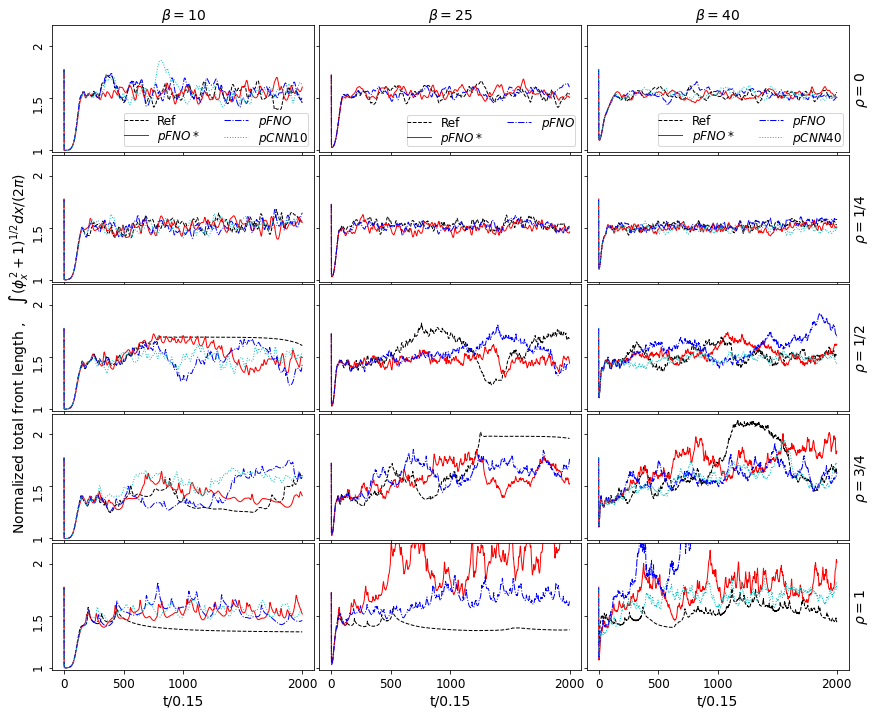

In [1367]:
all_list_model_names = [  ['pFNO*','pFNO','pCNN10'] ,['pFNO*','pFNO'], ['pFNO*','pFNO','pCNN40'] ] 
all_list_init = [ [3], [1],[3] ]  
all_list_para_values = [ 
    [ [10, 0], [10, 0.25] ,[10, 0.5] , [10, 0.75], [10, 1]],
    [ [25, 0], [25, 0.25] ,[25, 0.5] , [25, 0.75], [25, 1]],
    [ [40, 0], [40, 0.25] ,[40, 0.5] , [40, 0.75], [40, 1]], 
]
all_list_models_for_cmp =[ 
                         [ [{'name':model_name, 'para_name':'Lpi_rho','each_para_value': para_value ,'nStep':1,'Tout':20} 
                         for model_name in list_model_names ] 
                         for para_value in list_para_values ]
                         for list_model_names, list_para_values in zip(all_list_model_names, all_list_para_values) ]

png_filename = 'len_MKS.eps'
plot_para_len ( all_list_models_for_cmp, all_list_init , png_filename, ylim=(0.98,2.2), models= models)
#plot_para_len ( list_models_for_cmp, [0,2], png_filename, ylim=(-.01,.01), models= models)


In [1368]:
# list_para_values =  [[10, 0], [10, 0.25] ,[10, 0.5] , [10, 0.75], [10, 1]] 
# #list_para_values =  [[25, 0], [25, 0.25] ,[25, 0.5] , [25, 0.75], [25, 1]] 
# #list_para_values =  [[40, 0], [40, 0.25] ,[40, 0.5] , [40, 0.75], [40, 1]] 
# list_model_names = [   'pFNO*',  'pCNN10' ] 
# list_models_for_cmp =[ [{'name':model_name, 'para_name':'Lpi_rho','each_para_value': para_value ,'nStep':1,'Tout':20} 
#                          for model_name in list_model_names] 
#                          for para_value in list_para_values ]

# png_filename =None # 'len_MS.eps'
# plot_para_len ( list_models_for_cmp, [5,2], png_filename, ylim=(0.98,2.2), models= models)
# #plot_para_len ( list_models_for_cmp, [0,2], png_filename, ylim=(-.01,.01), models= models)

In [1369]:
def autocorr4(x,lags):
    '''fft, don't pad 0s, non partial'''
    mean=x.mean(axis=-1, keepdims=True)
    #var=np.var(x, axis=-1, keepdims=True)
    xp=x-mean

    cf=np.fft.fft(xp)
    sf=cf.conjugate()*cf
    corr=np.fft.ifft(sf).real/x.shape[-1] #/var

    return corr[..., :lags]


In [1370]:
def plot_para_autocorrelation(All_list_models_for_cmp ,   png_filename=None, models= models, bAutoCorr=False, n_steady = 500, ylim=None) : # 
 
    linestyles= ['r--', 'b-.','c:','g--']
    nRows = len(All_list_models_for_cmp)
    nCols = len(All_list_models_for_cmp[0][0])
    fig, axs = plt.subplots( nRows,  nCols,sharex=True, sharey=True,figsize= [16,2.5*len(All_list_models_for_cmp)])
    axs=axs.reshape(nRows, nCols ) 
    
    for irow_ , list_models_for_cmp in enumerate(All_list_models_for_cmp):
        
        #print(list_models_for_cmp) 
        
        list__nStep_all       =[]
        list__m_all           = []
        list__each_para_key_all=[]
        list__pred_all          =[]
        for models_for_cmp in list_models_for_cmp:
            #print ('models_for_cmp=', models_for_cmp)
            #-------
            nStep_all = [    m_['nStep'] for m_ in models_for_cmp] 
            m_all     = [ get_model(**m_ , models= models) for m_ in models_for_cmp]
            each_para_key_all = [ get_para_key( m_['para_name'], m_['each_para_value']) for m_ in models_for_cmp] 
            pred_all = [ m_[each_para_key+'list_pred'] for m_ , each_para_key in zip(m_all,each_para_key_all) ] 
            #------
            list__pred_all.append(pred_all )


        #---------------        
        x = m_all[0]['x']
        N = m_all[0]['sys']['N']

        levels= np.linspace(-1,1,20)
        cmap= 'rainbow'

        #-----------
        N_end =num_total_step
        def get_yy_xx(nStep,x=x, N_end = N_end, N_corr=N//2 ):
            y = np.arange(num_total_step//nStep+1) * nStep
            xx,yy = np.meshgrid(x,y,indexing='xy')
            return yy[:N_end, :N_corr],xx[:N_end, :N_corr]


        def calc_autocorrlation(disp, N=N, N_end=N_end, N_corr = N//2 ):
            return autocorr4( disp[:N_end,:], N_corr)
        #------

        nRow = len(models_for_cmp)
        num_models = len(list_models_for_cmp) 



        ####################################################
        xx = np.linspace( 0, np.pi, N//2)
        
        #print(axs.shape)
        for i, ax in enumerate(  axs[irow_,:] ) :
            #-----------
            d_ans     = m_all[0]['sys'][each_para_key_all[i]+'list_d_an']   
            #-----------    

            corr_ref = calc_autocorrlation(d_ans)[:,n_steady:,:].mean(axis=(0,1) )

            ax.plot( xx, corr_ref/corr_ref[0]    , color='lightgrey',  linewidth=4  )

            for j in range( num_models ):
                pred_pickplot = list__pred_all[j][i] 

                corr_model_pred = calc_autocorrlation(pred_pickplot)[:,n_steady:,:].mean(axis=(0,1) )
                if bAutoCorr==True:
                    ax.plot(xx,   corr_model_pred/corr_model_pred[0] , linestyles[j]    )
                else:
                    ax.plot(xx,   corr_model_pred/corr_ref[0] , linestyles[j]    )

            str__para_name = r'$\rho$='  if models_for_cmp[0]['para_name']=='nu' else r'$\beta$=' 

            if irow_==0:
                #ax.set_title( r'$\beta={:g},\rho={:g}$'.format( models_for_cmp[i]['each_para_value'][0], models_for_cmp[i]['each_para_value'][1] ), fontsize=14)
                ax.set_title( r'$\rho={}$'.format( Fraction( models_for_cmp[i]['each_para_value'][1] ) ), fontsize=14)

            if i==nCols-1:
                txt_legends = ['Ref']+ [ '$'+models_for_cmp[0]['name']+'$' for models_for_cmp in list_models_for_cmp] 
                ax.legend(txt_legends, fontsize=13,  frameon=True, borderpad=0,labelspacing=0.1)
                
                #ax2 = ax.twinx()
                ax.yaxis.set_label_position("right")
                ax.set_ylabel(r'$\beta={:g}$'.format(models_for_cmp[i]['each_para_value'][0] ),  fontsize=14  )
                #ax.set_yticks([])  

            #-----------    

    for ax in axs.flat:
        #ax.set_rasterized(True)
        ax.label_outer()
        ax.set_xlim( [0,np.pi])
        #ax.set_ylim( [-1, 1] )
        ax.set_xticks( [0,   np.pi] )
        ax.set_xticklabels(['0',  '$\pi$'  ] , fontsize=14 )
        ax.set_yticks( [-1/2, 0,1/2, 1] )
        ax.set_yticklabels(['-0.5', '0','0.5','1' ] , fontsize=12 )

        if ylim is not None:
            ax.set_ylim( ylim )
        
    plt.subplots_adjust(wspace=0.06,hspace=0.0)

        
    if png_filename is not None:
        print('save png: ',png_filename )
        plt.savefig(png_filename,dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


save png:  corr_MKS.eps


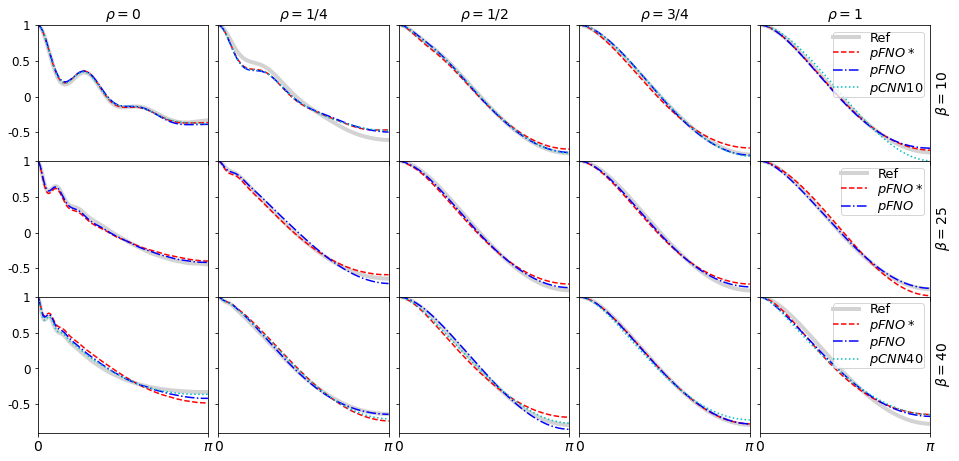

In [1371]:
bAutoCorr = True # False

list_Lpi= [10 ,25,40]
All_list_para_values =[   [[Lpi, 0],[Lpi,0.25],[Lpi,0.5],[Lpi,0.75],[Lpi,1]] for Lpi in  list_Lpi ]
All_list_model_names =[ ['pFNO*', 'pFNO','pCNN10'],  ['pFNO*', 'pFNO' ] , ['pFNO*', 'pFNO','pCNN40']  ]
#All_list_model_names =[ ['pFNO', 'pFNO*'] ]

All_list_models_for_cmp =     [ 
             [   [ {'name':model_name,'para_name':'Lpi_rho','each_para_value': para_value ,'nStep':1,'Tout':20}  for para_value in list_para_values ] 
             for model_name in list_model_names  ] 
             for list_model_names, list_para_values in zip(  All_list_model_names , All_list_para_values) ]

png_filename='corr_MKS.eps'
plot_para_autocorrelation(All_list_models_for_cmp,   png_filename=png_filename, models= models, bAutoCorr = bAutoCorr , ylim=[-0.9,1])



In [1372]:
#plot_para_autocorrelation(list_models_for_cmp, i_pickplot=3, png_filename=png_filename, models= models, bAutoCorr = bAutoCorr ,n_steady = 500)

In [1373]:
def plot_errors(list_models_for_cmp , i_pickplot,  png_filename=None, models= models) : # list__i_pickplot__init_d0=[1]

    import matplotlib.gridspec as gridspec

    
    
    list__nStep_all       =[]
    list__m_all           = []
    list__each_para_key_all=[]
    list__pred_all          =[]
    for models_for_cmp in list_models_for_cmp:
        #-------
        nStep_all = [    m_['nStep'] for m_ in models_for_cmp] 
        m_all     = [ get_model(**m_ , models= models) for m_ in models_for_cmp]
        each_para_key_all = [ get_para_key( m_['para_name'], m_['each_para_value']) for m_ in models_for_cmp] 
        pred_all = [ m_[each_para_key+'list_pred'] for m_ , each_para_key in zip(m_all,each_para_key_all) ] 
        #------
        list__pred_all.append(pred_all )
        list__each_para_key_all.append(each_para_key_all)
    #-----------
    str__para_name        = r'$\rho$='  
    str__para_name_legend = [ r'$\rho={}$'.format( Fraction(m['each_para_value'][1]) )  for m in models_for_cmp ]
    #----------
        
    
    #---------------        
    x = m_all[0]['x']
    N = m_all[0]['sys']['N']
    
    levels= np.linspace(0,0.1,20)
    cmap= 'rainbow'

    #-----------
    N_end = num_total_step+1 #1500
    def get_yy_xx(nStep,x=x, N_end = N_end):
        y = np.arange(num_total_step//nStep+1) * nStep
        xx,yy = np.meshgrid(x,y,indexing='xy')
        #return yy,xx
        return yy[:N_end],xx[:N_end]

    def calc_slope( disp, N=N, N_end=N_end ):
        slope= np.diff(disp,axis=1,append=disp[:,0:1])/(2*np.pi/N)
        return slope[:N_end]
    #------

    nRow = len(models_for_cmp)

    
    num_models = len(list_models_for_cmp) 
    fig, axs = plt.subplots(nRow, num_models ,sharex=True, figsize= [1.6*num_models ,nRow*1.8 ])

    #----------
    title_1 =[ r'$\genfrac{}{}{0}{}{  ' +models_for_cmp[0]['name']  + '}{'+  r'\beta={:g}'.format(models_for_cmp[0]['each_para_value'][0])  + '}$'   for models_for_cmp in list_models_for_cmp ]
    #title_2 =[  for models_for_cmp in list_models_for_cmp ]
    rows = ['{:g}'.format( model['each_para_value'][0] ) for model in models_for_cmp ]
    for ax, t1  in zip(axs[0], title_1):
        ax.set_title( t1, fontsize= 18 , pad=15)
        #ax.set_supertitle( t1, fontsize=12)

    for icol, ax_cols in enumerate(  axs ) :
        
        
        for idx, pred_all   in enumerate( list__pred_all  ):
            #-----------
            each_para_key_all = list__each_para_key_all[idx]
            d_an     = m_all[icol]['sys'][each_para_key_all[icol]+'list_d_an'][ i_pickplot ][...,:N_end]
            #-----------    
            
            pred_pickplot =  pred_all[icol][ i_pickplot ][...,:N_end]
            
            pos = ax_cols[idx].contourf( *get_yy_xx(1)    , ((pred_pickplot - d_an)**2/(d_an**2).mean(axis=(-2,-1),keepdims=True))**0.5 , levels = levels ,cmap=cmap  )   
            
            #fig.colorbar(pos , ax=ax_cols[idx])    
        #-----------    
        for idx, ax in enumerate(ax_cols):
            
            ax.set_yticks( [-np.pi, 0, np.pi] )
            if icol == 0:  
                ax.set_yticklabels(['-$\pi$', '0', '$\pi$'], fontsize=10,rotation='vertical')
            else:
                ax.set_yticklabels(['-$\pi$', '0', ''], fontsize=10,rotation='vertical')
            ax.set_ylabel('x',fontsize=13)

            ax.set_xticks( [0, 25, 50 ] )
            ax.set_xticklabels(['0', '25', '50'   ], fontsize=14)

            
            ax.xaxis.set_tick_params(labelsize=14)
            ax.set_xlabel('t/0.15',fontsize=14)

            if idx == len(ax_cols)-1: 
                ax.yaxis.set_label_position("right")
                ax.set_ylabel( str__para_name_legend[icol],fontsize=13)
            
    for ax in axs.flat:
        ax.label_outer()
        ax.set_xlim([0,75])
    fig.tight_layout(  )
    plt.subplots_adjust(wspace=0.05,hspace=0.04)
    
        
    if png_filename is not None:
        print('save png: ',png_filename )
        plt.savefig(png_filename,dpi=300)

save png:  err_MKS.png


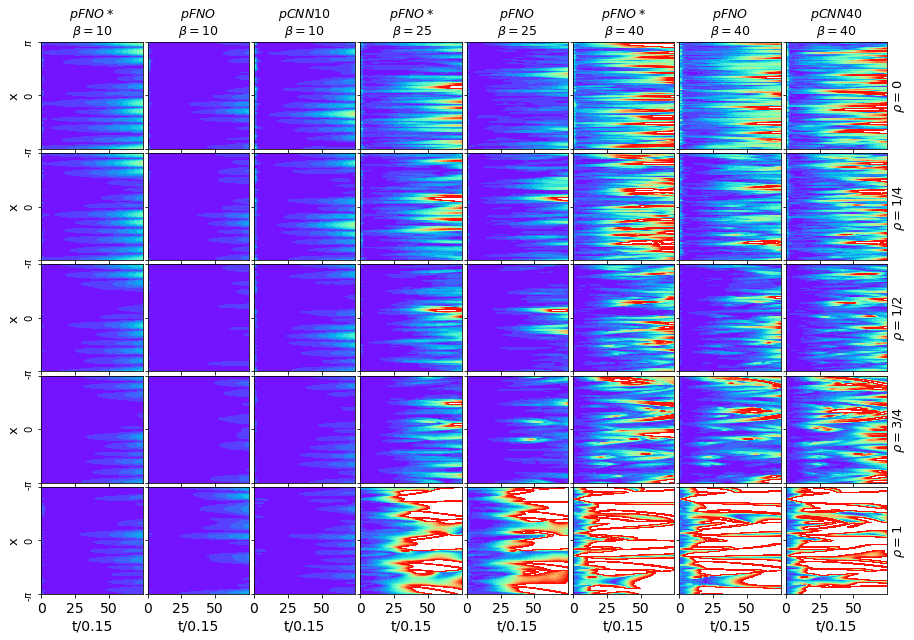

In [1374]:


list_model_names_Lpi = [ ['pFNO*',10], ['pFNO',10], ['pCNN10',10],['pFNO*',25], ['pFNO',25],  ['pFNO*',40] , ['pFNO',40] , ['pCNN40',40]  ] 

list_rho_values = [ 0, 0.25, 0.5,0.75, 1 ]

list_models_for_cmp =[ [{'name':model_name, 'para_name':'Lpi_rho','each_para_value': [Lpi,rho] ,'nStep':1,'Tout':20} 
                         for rho in list_rho_values ] 
                         for model_name, Lpi in list_model_names_Lpi ]

png_filename=   'err_MKS.png'
plot_errors(list_models_for_cmp,  i_pickplot = 1, png_filename=png_filename, models= models)

In [1375]:
def plot_para_slope(list_models_for_cmp , i_pickplot,  png_filename=None, models= models) : # list__i_pickplot__init_d0=[1]
    #list__i_pickplot__init_d0=[1,3]

    
    list__nStep_all       =[]
    list__m_all           = []
    list__each_para_key_all=[]
    list__pred_all          =[]
    for models_for_cmp in list_models_for_cmp:
        #-------
        nStep_all = [    m_['nStep'] for m_ in models_for_cmp] 
        m_all     = [ get_model(**m_ , models= models) for m_ in models_for_cmp]
        each_para_key_all = [ get_para_key( m_['para_name'], m_['each_para_value']) for m_ in models_for_cmp] 
        pred_all = [ m_[each_para_key+'list_pred'] for m_ , each_para_key in zip(m_all,each_para_key_all) ] 
        #------
        list__pred_all.append(pred_all )
        
    #-----------
    #str__para_name        = r'$\rho$='  if models_for_cmp[0]['para_name']=='dd' else r'$\beta$=' 
    #str__para_name_legend = [ str__para_name+str(m['each_para_value'])    for m in models_for_cmp ]
    str__para_name_legend = [ r'$\beta={:g},\rho={}$'.format(m['each_para_value'][0], Fraction( m['each_para_value'][1] ) )     for m in models_for_cmp ] 
    #----------
        
    # if models_for_cmp2 is not None:
    #     nStep_all2 = [    m_['nStep'] for m_ in models_for_cmp2] 
    #     m_all2     = [ get_model(**m_ , models= models) for m_ in models_for_cmp2]
    #     each_para_key_all2 = [ get_para_key( m_['para_name'], m_['each_para_value']) for m_ in models_for_cmp2] 
    #     pred_all2 = [ m_[each_para_key+'list_pred'] for m_ , each_para_key in zip(m_all2,each_para_key_all2) ] 
    
    #---------------        
    x = m_all[0]['x']
    N = m_all[0]['sys']['N']
    
    #levels= np.linspace(-2.5,2.5,20)
    levels= np.linspace(-3.5,3.5,20)
    cmap= 'rainbow'

    #-----------
    N_end = 2000 # num_total_step #1500
    def get_yy_xx(nStep,x=x, N_end = N_end):
        y = np.arange(num_total_step//nStep+1) * nStep
        xx,yy = np.meshgrid(x,y,indexing='xy')
        #return yy,xx
        return yy[:N_end],xx[:N_end]

    def calc_slope( disp, N=N, N_end=N_end ):
        slope= np.diff(disp,axis=1,append=disp[:,0:1])/(2*np.pi/N)
        return slope[:N_end]
    #------

    nRow = len(models_for_cmp)

    # if models_for_cmp2 is not None:
    #     fig, axs = plt.subplots(nRow, 3 ,sharex=True, sharey=True,figsize= [12,nRow*2*1.25])
    #     cols = ['Ref',  models_for_cmp[0]['name'],  models_for_cmp2[0]['name'] ]
    # else:
    #     fig, axs = plt.subplots(nRow, 2 ,sharex=True, sharey=True,figsize= [12,nRow*2*1.25])
    #     cols = ['Ref',  models_for_cmp[0]['name'] ]
    num_models = len(list_models_for_cmp) 
    fig, axs = plt.subplots(nRow, num_models+1 ,sharex=True, figsize= [12,nRow*2*1.25])
    #fig, axs = plt.subplots(nRow, num_models+1 ,sharex=True, sharey=True,figsize= [12,nRow*2*1.25], facecolor = 'aliceblue')
    cols = ['Ref'] + [ models_for_cmp[0]['name'] for models_for_cmp in list_models_for_cmp ]

    
    #----------
    rows = [r"\beta={:g},\rho={:g}".format( model['each_para_value'][0] , model['each_para_value'][1]) for model in models_for_cmp ]

    for ax, col in zip(axs[0], cols):
        ax.set_title('$'+col+'$', fontsize=14)

#     pad = 5 # in points
#     for ax, row in zip(axs[:,0], rows):
#         #ax.set_ylabel(row, rotation=90, size='large')
#         ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
#                     xycoords=ax.yaxis.label, textcoords='offset points',
#                     size='large', ha='right', va='center')
        
    #----------
    
    for icol, ax_cols in enumerate(  axs ) :
        
        #i_pickplot = list__i_pickplot__init_d0[icol]
        #-----------
        d_an     = m_all[icol]['sys'][each_para_key_all[icol]+'list_d_an'][ i_pickplot ]
        #-----------    
        ax_cols[0].contourf( *get_yy_xx(1)    , calc_slope(d_an)          , levels = levels ,cmap=cmap  )

        for idx, pred_all in enumerate(list__pred_all):
            pred_pickplot =  pred_all[icol][ i_pickplot ]
            ax_cols[idx+1].contourf( *get_yy_xx(1)    , calc_slope(pred_pickplot) , levels = levels ,cmap=cmap  )   
        #-----------    
 
        # if models_for_cmp2 is not None:
        #     pred_pickplot2 =  pred_all2[icol][ i_pickplot ]
        #     ax_cols[2].contourf( *get_yy_xx(1)    , calc_slope(pred_pickplot2) , levels = levels ,cmap=cmap  )   
                
        for idx, ax in enumerate(ax_cols):
            
            ax.set_yticks( [-np.pi, 0, np.pi] )
            if icol == 0:  
                ax.set_yticklabels(['-$\pi$', '0', '$\pi$'], fontsize=14,rotation='vertical')
            else:
                ax.set_yticklabels(['-$\pi$', '0', ''], fontsize=14,rotation='vertical')
            ax.set_ylabel('x',fontsize=14)
            
            #ax.set_xticks( [ 0,100,200,300,400 , 500] )
            #ax.set_xticklabels(['0','100','200','300','400','500'], fontsize=14)
            ax.xaxis.set_tick_params(labelsize=14)
            ax.set_xlabel('t/0.15',fontsize=14)

            if idx == len(ax_cols)-1: 
                ax.yaxis.set_label_position("right")
                ax.set_ylabel( str__para_name_legend[icol],fontsize=14)
            
    for ax in axs.flat:
        ax.label_outer()
        #ax.set_xlim([0,2000])
        
    fig.tight_layout(  )
    plt.subplots_adjust(wspace=0.01,hspace=0.01)

    #fig.text(0.465, 0.001, 't/0.015', ha='center',fontsize=16)
    #fig.text(0.001, 0.52, 'x', va='center', rotation='vertical',fontsize=14 )

    #----
    # str__para_name = r'$\nu$='  if models_for_cmp[0]['para_name']=='nu' else r'$\mathcal{L}$=' 
    # list_legend = [  m['each_para_value'] for m in models_for_cmp ]
    # dy =(0.95-0.05)/len(list_legend)
    # for idx, legend_text in enumerate(list_legend[::-1]):
    #     ypos = 0.05+(0.5+idx)*dy
    #     #fig.text(0.985, ypos, legend_text,  rotation='vertical',fontsize=14 ,transform=plt.gcf().transFigure, weight='bold')
    #     fig.text(0.9905, ypos, str__para_name+str(legend_text),  rotation='vertical',fontsize=13 ,transform=plt.gcf().transFigure) #, weight='bold')
    #---    
    #fig.tight_layout()
    #plt.subplots_adjust(wspace=0.01,hspace=0.01)
        
    if png_filename is not None:
        print('save png: ',png_filename )
        plt.savefig(png_filename,dpi=300)

save png:  uSlope_MKS_beta40.png


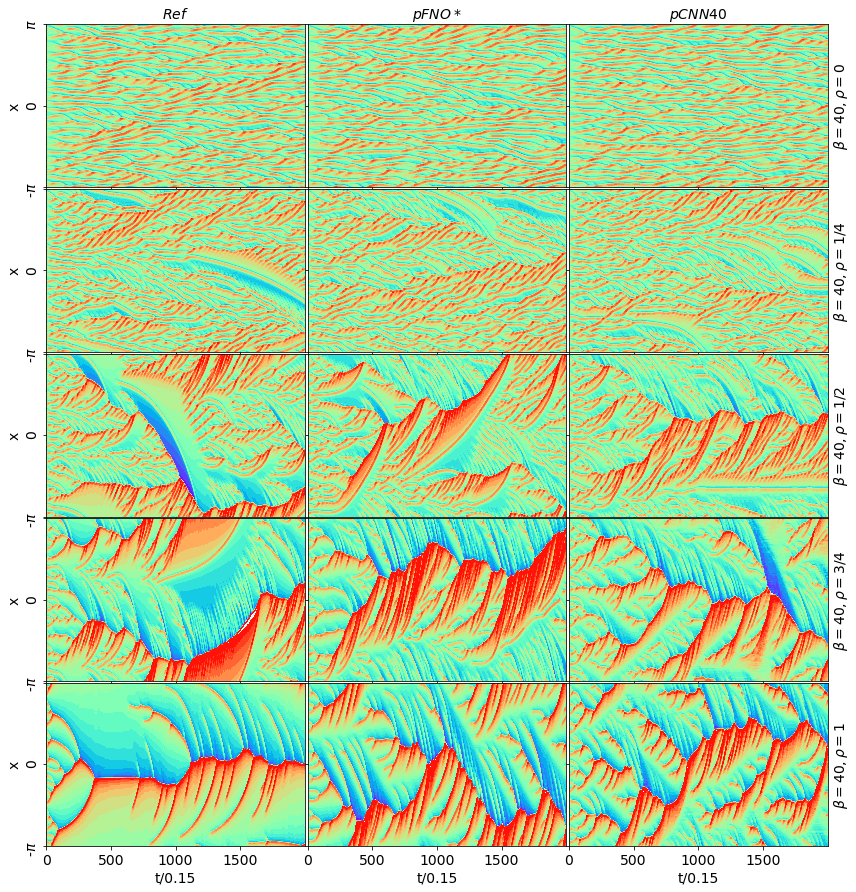

In [1376]:

list_model_names = ['pFNO*', 'pCNN40'] 
list_para_values =  [[40, 0], [40, 0.25] ,[40, 0.5] , [40, 0.75], [40, 1]] 
list_models_for_cmp =[ [{'name':model_name, 'para_name':'Lpi_rho','each_para_value': para_value ,'nStep':1,'Tout':20} 
                         for  para_value in list_para_values ] 
                         for model_name in list_model_names ]

png_filename= 'uSlope_MKS_beta40.png'

plot_para_slope(list_models_for_cmp, i_pickplot=3, png_filename=png_filename , models= models)



save png:  uSlope_MKS_beta10.png


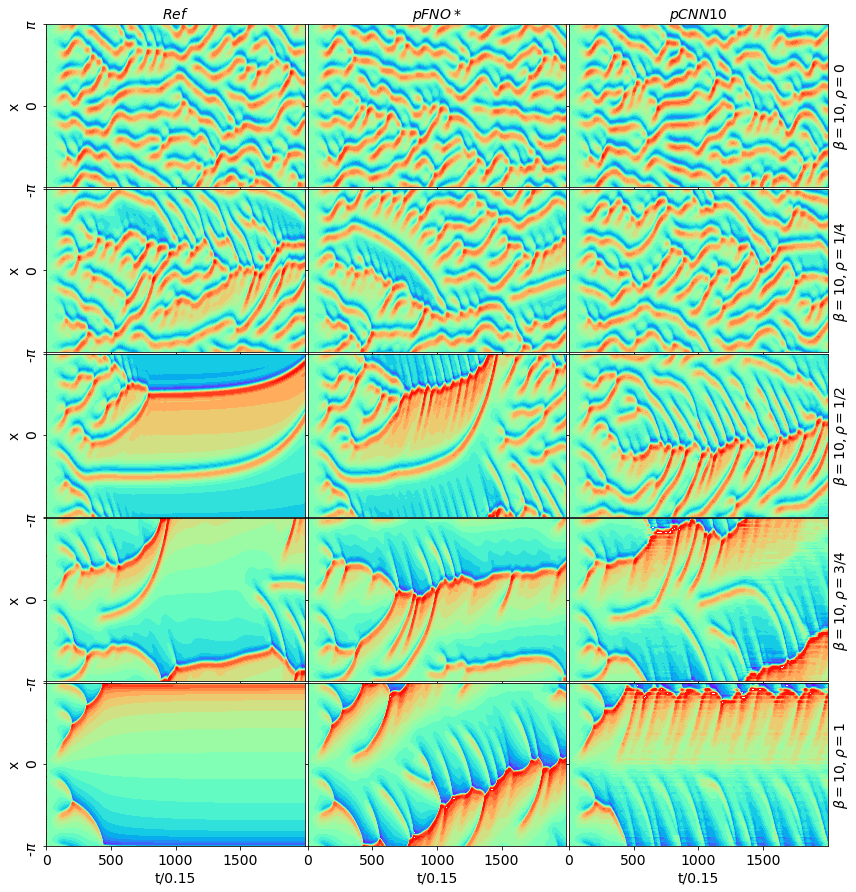

In [1377]:
list_model_names = ['pFNO*','pCNN10'] 
list_para_values =  [[10, 0], [10, 0.25] ,[10, 0.5] , [10, 0.75], [10, 1]] 
list_models_for_cmp =[ [{'name':model_name, 'para_name':'Lpi_rho','each_para_value': para_value ,'nStep':1,'Tout':20} 
                         for  para_value in list_para_values ] 
                         for model_name in list_model_names ]

png_filename=  'uSlope_MKS_beta10.png'

plot_para_slope(list_models_for_cmp, i_pickplot=3, png_filename=png_filename , models= models)


save png:  uSlope_MKS_beta25.png


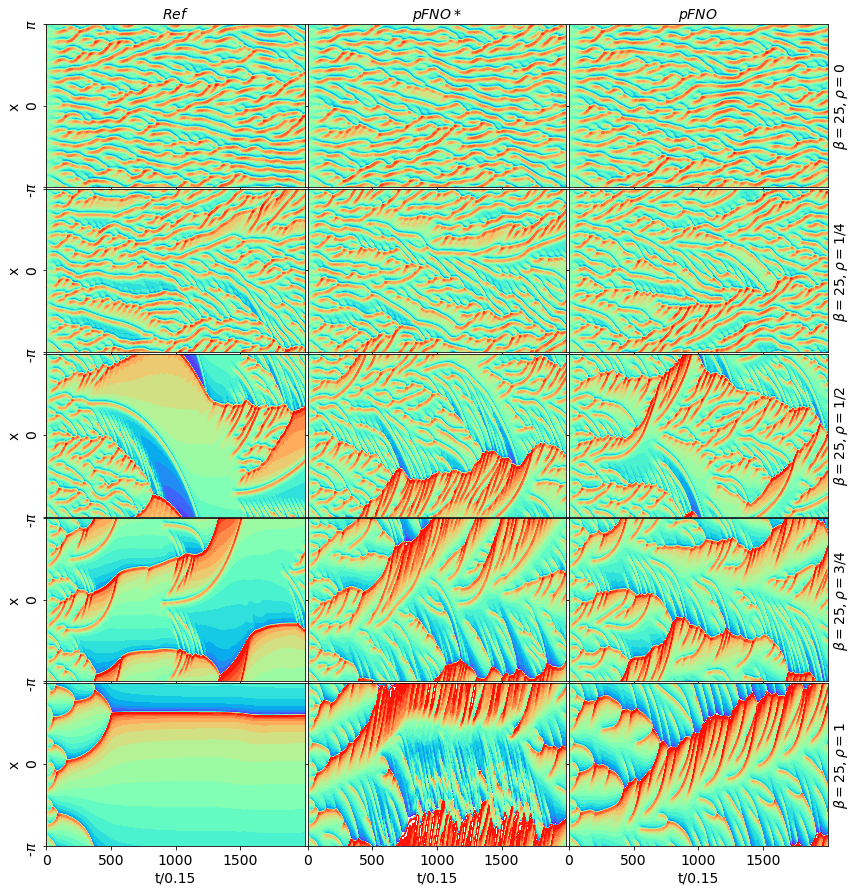

In [1378]:
list_model_names = ['pFNO*','pFNO'] 
list_para_values =  [[25, 0], [25, 0.25] ,[25, 0.5] , [25, 0.75], [25, 1]] 
list_models_for_cmp =[ [{'name':model_name, 'para_name':'Lpi_rho','each_para_value': para_value ,'nStep':1,'Tout':20} 
                         for  para_value in list_para_values ] 
                         for model_name in list_model_names ]

png_filename=  'uSlope_MKS_beta25.png'

plot_para_slope(list_models_for_cmp, i_pickplot=2, png_filename=png_filename , models= models)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


savefig:  dRel_ana.eps


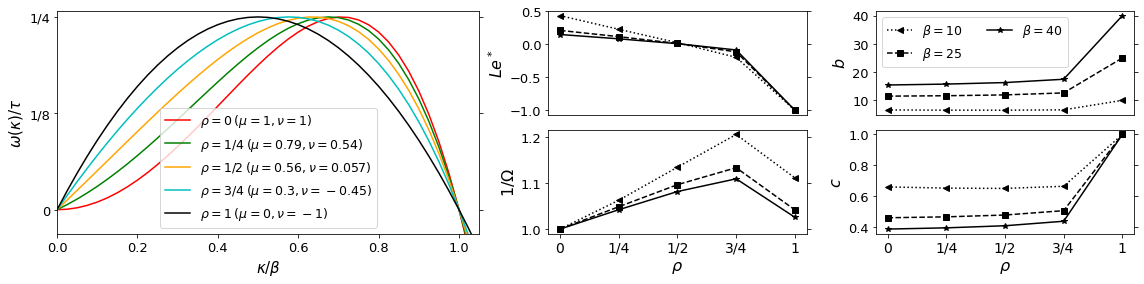

In [1406]:

from scipy.optimize import fsolve
def _func_( b_c_eps_sigma, rho, beta, nu, mu ):
    b,c,eps,sigma = b_c_eps_sigma
    b2=b**2
    c2=c**2
    return [(b/c) - beta ,
             eps/c2 - nu,
            (1-sigma)*(b*c)-rho,
            4*(1+eps)**2/b2-mu*c2**2 ]

b_c_eps_sigma0_dict = { 0:[ 15, 0.38, 6.7, 1 ], 1:[ 9.27, 0.33 ,2 , 0.82 ] , 2:[7.3, 0.182 , 1.72 , 0.62 ], 3:[12.7, 0.3 , -4.4 , 0.81 ], 4: [40, 1, -1, 0.975 ] }    


def dispersion_relation(png_filename=None):
    kk = np.arange(128+1);
    
    #import matplotlib.gridspec as gridspec    
    
    fig = plt.figure( figsize=(16,4))

    #gs0 = gridspec.GridSpec(2, 7, figure=fig)
    #ax = fig.add_subplot(gs0[:,:3])

    ax = plt.subplot2grid((2, 7), (0, 0),  colspan=3, rowspan=3)
    ax1 = plt.subplot2grid((2, 7), (0, 5),  colspan=2, rowspan=1)
    ax12 = plt.subplot2grid((2, 7), (1, 5),  colspan=2, rowspan=1)    
    ax2 = plt.subplot2grid((2, 7), (0, 3),  colspan=2, rowspan=1)
    ax22 = plt.subplot2grid((2, 7), (1, 3),  colspan=2, rowspan=1)    
    
    colors=['r','g', 'orange', 'c' ,'k']
    for idx, Lpi in enumerate( [40] ):
        
        linestyle = '-' if idx==0 else '-.'
        
        for idc, d_ratio in enumerate( [0, 0.25,  0.5, .75 , 1 ] ):
            k = kk/Lpi;
            mu,nu, tau = libSiva.Coeff_Lpi_d_to_mu_nu_tau(Lpi, d_ratio, max_amplitude=0.25 )
            #print('Lpi:',Lpi, ' mu:', mu, 'nu:', nu, 'd_ratio:', d_ratio, 'tau:', tau)

            disp_relation = -(mu* k**4   - nu* k**2- d_ratio*k );
            if np.isclose(mu,0): mu =0
            if np.isclose(nu,0): nu =0
            if np.isclose(nu,1): nu =1
            if np.isclose(nu,-1): nu =-1
            

            my_label = r"$ \rho={} \:(\mu={:.2g}, \nu={:.2g})$".format(Fraction(d_ratio),mu, nu )
            #ax.plot( kk[np.where(kk<Lpi+1)], disp_relation[np.where(kk<Lpi+1) ], '-' , label= my_label )
            
            ax.plot( kk[np.where(kk<Lpi+10)]/Lpi, disp_relation[np.where(kk<Lpi+10) ], linestyle, color=colors[idc] , label= my_label )
    
    ax.set_ylabel(r'$ \omega(\kappa) /\tau  $', fontsize=15)
    ax.set_xlabel(r'$  \kappa /\beta  $', fontsize=15)
    ax.set_yticks([ 0,1/8, 1/4, ], ['0', '1/8','1/4']  )
    ax.set_xlim([0, 1.05])
    ax.set_ylim([-1/32,1/4+1/128])
    ax.tick_params(axis='x', labelsize=13)
    ax.tick_params(axis='y', labelsize=13)
    
    
    ax.yaxis.set_ticks_position('both')
    
    #ax.axhline(0,linestyle='-.', color='grey',linewidth=0.5)
    ax.legend(fontsize=12.5,  ncol=1 )
    
    #-----------------------------
    #-----------------------------
    #-----------------------------
    

    N=5

    list_Lpi =np.linspace(10,40,3)
    list_rho= np.linspace(0,1,N)
    list_b = np.zeros(N) 
    list_c = np.zeros(N) 
    list_eps = np.zeros(N) 
    list_sigma = np.zeros(N) 



    my_linestyle=[ 'k:<', 'k--s', 'k-*']
    for idx_Lpi, Lpi in enumerate(list_Lpi):
        for idx_rho,  rho in enumerate(list_rho):
            mu,nu, tau = libSiva.Coeff_Lpi_d_to_mu_nu_tau(Lpi, rho, max_amplitude=0.25 )

            func = lambda b_c_eps_sigma: _func_( b_c_eps_sigma, rho, Lpi, nu, mu )
            root = fsolve(func, b_c_eps_sigma0_dict[idx_rho] )
            b,c,eps,sigma = root
            #print(rho,Lpi, b,c,eps,sigma0 )
            list_b[idx_rho], list_c[idx_rho], list_eps[idx_rho], list_sigma[idx_rho]= b,c,eps,sigma

            if not any(np.isclose(func(root), [0, 0, 0, 0])) : print('error')

        strlabel = r'$\beta={:g}$'.format(Lpi)

        ax1.plot( list_rho, list_b,  my_linestyle[idx_Lpi], label=  strlabel)    
        ax12.plot( list_rho, list_c,     my_linestyle[idx_Lpi] , label= strlabel )    
        ax1.set_ylabel(r'$b$',fontsize=16)
        #ax1.set_xticks([ 0,1/4,1/2, 3/4,1 ], ['0', '1/4','1/2','3/4', '1'])
        ax1.set_xticks([])
        ax1.tick_params(axis='y', labelsize=13)
        ax1.yaxis.set_ticks_position('both')
        
        ax12.set_ylabel(r'$c$',fontsize=16)
        ax12.set_xlabel(r'$\rho$',fontsize=16)
        ax12.tick_params(axis='y', labelsize=13)
        ax12.set_xticks([ 0,1/4,1/2, 3/4,1 ], ['0', '1/4','1/2','3/4', '1'], fontsize=14)
        ax12.yaxis.set_ticks_position('both')

        ax2.plot( list_rho, list_eps, my_linestyle[idx_Lpi] , label=  strlabel)    
        ax2.set_ylabel(r'$Le^*$',fontsize=16)
        ax2.set_xticks([ 0,1/4,1/2, 3/4,1 ], ['0', '1/4','1/2','3/4', '1'])
        ax2.tick_params(axis='y', labelsize=13)
        ax2.yaxis.set_ticks_position('both')
        ax2.set_xticks([])
        
        ax22.plot( list_rho, 1/list_sigma,  my_linestyle[idx_Lpi] , label= strlabel )    
        ax22.set_ylabel(r'$1/\Omega$',fontsize=16)
        ax22.set_xlabel(r'$\rho$',fontsize=16 )
        ax22.tick_params(axis='y', labelsize=13)
        ax22.set_xticks([ 0,1/4,1/2, 3/4,1 ], ['0', '1/4','1/2','3/4', '1'], fontsize=14)
        ax22.yaxis.set_ticks_position('both')


    
    ax1.legend( fontsize=12.5 , ncol=2)
    fig.tight_layout()
    
    #---------------------------------
    
    if png_filename is not None:
        #ax.set_rasterized(True)
        print('savefig: ', png_filename)
        if 'eps' in png_filename:
            plt.savefig(png_filename, format='eps' )
        else:
            plt.savefig(png_filename, dpi=300)    
dispersion_relation('dRel_ana.eps')

In [1380]:
ra_cx = 0.01* torch.ones(1,256)
n = ra_cx.shape[-1]//2
zero_pad =  torch.zeros (  *ra_cx.shape[:-1], 1).to(ra_cx.device)
length   = ra_cx[...,:n+1]
angle    = torch.cat( [ zero_pad,  ra_cx[...,n+1:], zero_pad] , dim =-1)
cx  = length.unsqueeze(-1)*torch.stack([torch.cos( angle), torch.sin( angle)], dim=-1)

In [1381]:
#angle
#torch.stack([torch.cos( angle), torch.sin( angle)], dim=-1).shape
#plt.plot( torch.fft.irfft( torch.view_as_complex(cx) ).squeeze() [1:] )
#torch.fft.irfft( torch.view_as_complex(cx) ).squeeze()

In [1382]:
#------------------
# def my_irfft( ra_cx ):  # rx.shape = 1, 256
#     n = ra_cx.shape[-1]//2
#     zero_pad =  torch.zeros (  *ra_cx.shape[:-1], 1).to(ra_cx.device)
#     length   = ra_cx[...,:n+1]
#     angle    = torch.cat( [ zero_pad,  ra_cx[...,n+1:], zero_pad] , dim =-1)
#     cx  = length.unsqueeze(-1)*torch.stack([torch.cos( angle), torch.sin( angle)], dim=-1)    
#     return torch.fft.irfft( torch.view_as_complex(cx) )
# def my_rfft(x):
#    cx = torch.fft.rfft( x ,dim=-1)
#    ra_cx = torch.cat( [cx.abs(), cx.angle()[...,1:-1] ], dim=-1)
#    return ra_cx

def my_irfft( rx ):  # rx.shape = 1, 256//2+1 
   return torch.fft.irfft( rx )
def my_rfft(x):
   cx = torch.fft.rfft( x, dim=-1)
   return cx.abs()                # shape 256//N+1

def my_model( ra_cx,  para_value  , model, x_steady = 0 ):
    
    x = my_irfft( ra_cx ).unsqueeze(-1)
    
    #x = x + x_steady.to(x.device)
    #pdepara = torch.tile( torch.tensor( para_value,dtype=torch.float), (1,1) ).to(device) 
    pdepara = torch.tensor([[ para_value ]], dtype=torch.float).to(device) 

    #y = model_load(  x, torch.tensor([[ pdepara ]]).to(device)  )
    y = model(  x,  pdepara)
    y = y.view( *y.shape[:-1] )   # remove the last dimention

    ra_cy = my_rfft( y )
    
    return ra_cy


#
#all_list_model_names = [ ['pFNO*','pCNN10'] ,['pFNO*'] , ['pFNO*','pCNN40'] ]
#list_models = [model_search['model']  for model_search in models for model_alias in list_model_names if  model_search['alias'] == model_alias ]     
#
def calc_dispersion_relation_for_models(all_list_model_names, list_Lpi, List_rho  ): 

    MaxNum_model = len(all_list_model_names[0])
    dispersion_relation_models  = np.zeros( ( MaxNum_model, len(list_Lpi), len(list_rho), 256//2+1           ) )
    jacobian_all                = np.zeros( ( MaxNum_model, len(list_Lpi), len(list_rho), 256//2+1 ,256//2+1 ) )

    for idx_Lpi, list_model_names  in enumerate( all_list_model_names):
        
        Lpi = list_Lpi[idx_Lpi]
        
        for idx_model, model_names in enumerate(list_model_names):
            #------------------------------------------------
            model = None
            for model_search in models:
                if model_search['alias'] == model_names: 
                        model = model_search['model'] 
            #------------------------------------------------
            if 'FNO' in model_names : 
                x_perturb = 1E-2
            elif 'CNN' in model_names : 
                x_perturb = 1E-1
                
            #rx = x_perturb* torch.ones(1,256).to(device)
            rx = x_perturb* torch.ones(1,256//2+1).to(device)
            
            for idx_rho, rho in enumerate(list_rho):
                jacobian_now = torch.autograd.functional.jacobian(lambda t_: my_model(t_, [Lpi,rho], model), rx)
                my_jac =  jacobian_now[0,:,0,:].detach().cpu()

                jacobian_all[idx_model,idx_Lpi,idx_rho,:,:] = my_jac

                dispersion_relation_models[idx_model,idx_Lpi,idx_rho, :] = np.log(np.diag( my_jac[:,:]  ) )/0.15  # 0.15 is time step
                dispersion_relation_models[idx_model,idx_Lpi,idx_rho, 0] = 0

    return dispersion_relation_models, jacobian_all

def ananlytical_dispersion_relation(  list_Lpi, List_rho ):
    kk = np.arange(128+1);
    disp_rel = np.zeros( ( len(list_Lpi), len(list_rho) , 129)  )
    for idx_Lpi, Lpi in enumerate(list_Lpi):
        for idx_rho, d_ratio in enumerate(list_rho):
            k = kk/Lpi;
            mu,nu, tau = libSiva.Coeff_Lpi_d_to_mu_nu_tau(Lpi, d_ratio, max_amplitude=0.25 )
            disp_relation = -(mu* k**4   - nu* k**2- d_ratio*k );
            if np.isclose(mu,0): mu =0
            if np.isclose(nu,0): nu =0
            if np.isclose(nu,1): nu =1
            if np.isclose(nu,-1): nu =-1
            disp_rel[idx_Lpi,idx_rho, :] =  (tau)*disp_relation
    return disp_rel

In [1383]:
list_rho=[0, 0.25, 0.5, 0.75, 1]
list_Lpi= [10, 25, 40]
disp_rel_analytical = ananlytical_dispersion_relation(list_Lpi, list_rho)


In [1384]:
all_list_model_names = [ ['pFNO*','pFNO','pCNN10'] ,['pFNO*', 'pFNO'] , ['pFNO*','pFNO', 'pCNN40'] ]

#-----
disp_rel_models , jacobian_all  = calc_dispersion_relation_for_models( all_list_model_names, list_Lpi, list_rho )

/tmp/ipykernel_1600094/2180591497.py:72: RuntimeWarning: invalid value encountered in log
  dispersion_relation_models[idx_model,idx_Lpi,idx_rho, :] = np.log(np.diag( my_jac[:,:]  ) )/0.15  # 0.15 is time step


In [1385]:
jacobian_all.shape

(3, 3, 5, 129, 129)

In [1386]:
from fractions import Fraction

def cmp_plt_dispersion_relation( all_list_model_names,  disp_rel_models,  disp_rel_analytical, list_Lpi, list_rho,png_filename):

    kk = np.arange(128+1);

    
    rho_colors=['r','g', 'orange', 'c' ,'k']
    model_style=['--','-.',':']
    #rho_style=['-', '--', '-.', ':', '.']
    
    #rho_style=['solid','densly dashed', 'dashed', 'densly dashed', 'dashdot']
    #rho_style=['-',   (0, (5, 1))  , (0, (3, 1,1,1)), '--',   '-.']
    #model_color=['r','c']
    #rho_colors=['grey','grey','grey','grey','grey']

    fig, axs = plt.subplots(1,len(list_Lpi)+1, figsize=(16,4 ))
    
    for idx_Lpi , Lpi in enumerate(list_Lpi):
        ax = axs[idx_Lpi]

        k_cut = Lpi+1
        
        
        lines =[]
        for i, d_ratio in enumerate(list_rho) :
            
            my_label = r"{}".format(Fraction(d_ratio))
            
            lines += ax.plot( kk[:k_cut], disp_rel_analytical[idx_Lpi,i,:k_cut] , linestyle= '-', color= rho_colors[i], alpha=0.3, linewidth=3, label= my_label )
            

        for m in  range( len(all_list_model_names[idx_Lpi]) ):
            for i, d_ratio in enumerate(list_rho) :
                lines += ax.plot( kk[:k_cut], disp_rel_models[m,idx_Lpi,i,:k_cut] ,linestyle= model_style[m], color= rho_colors[i]  ) # , label= my_label )

        # model_style = ':' 
        # for i, d_ratio in enumerate(list_rho) :
        #     ax.plot( kk[:k_cut], disp_rel_models[1,idx_Lpi,i,:k_cut] , model_style+rho_colors[i] )# , label= my_label )


        if idx_Lpi==0:    ax.set_ylabel(r'$  \omega(\kappa)$', fontsize=16)
        ax.set_xlim([0, Lpi])

        if Lpi==40:      ax.set_ylim([-1/16,1])             #ax.set_yticks([-1/8, 0,1/8, 1/4], ['-1/4', '0', '1/2', '1'])
        elif Lpi==25:    ax.set_ylim([-1/16,1])
        else:            ax.set_ylim([-1/16,1])            #ax.set_yticks([ 0, 1/16], [ '0', '1/16' ])

        ax.plot([0,0], [k_cut,0])
        ax.set_xlabel('$\kappa$', fontsize=16)
        ax.set_yticks([ 0, 1/4, 1/2, 3/4, 1], ['0', '1/4','1/2', '3/4','1'], fontsize=14)
        
        ax.tick_params(axis='x', labelsize=14)
        
        #str_legend_title = r"$\beta={:g},\rho$".format( Lpi)
        str_legend_title = r"$\rho$"
        le= ax.legend( title=str_legend_title,loc="upper left"  ,  fontsize=13, frameon=True, borderpad=0,labelspacing=0.1)
        le.get_title().set_fontsize('14')
        
        from matplotlib.legend import Legend
        leg = Legend(ax, lines[4::5], ['Ref']+all_list_model_names[idx_Lpi] , fontsize=13,   loc='upper right', frameon=True, borderpad=0,labelspacing=0.1 )
        ax.add_artist(leg);        
        ax.set_title( r'$\beta={:g}$'.format(Lpi) , fontsize=16 ) 
        #--------------------------------------

        
     
    for ax in axs.flat:
        #ax.set_rasterized(True)
        ax.label_outer()
    #----------------
    ax=axs[-1]
    # [idx_model,idx_Lpi,idx_rho,  :  ,  :]
    #(       3  ,   3   ,   5   , 129 , 129)    
    ax.imshow( jacobian_all[0, -1, -1,:45,:45 ] ) 
    ax.set_title( r'$J(\kappa, \overline{\kappa})$ at ${\beta=40,\rho=1}$, pFNO*' , fontsize=16 ) 
    ax.set_xlabel(r'$\kappa$', fontsize=16)
    ax.set_ylabel(r'$\overline{\kappa}$', fontsize=16)
    ax.tick_params(axis='x', labelsize=14)

 
    #----------------
    fig.tight_layout()
    plt.subplots_adjust(left=0.045, right=1, top=0.91, wspace=0.05)
        
        
    if png_filename is not None:
        print('save png: ',png_filename )
        plt.savefig(png_filename,dpi=300)

save png:  drel.png


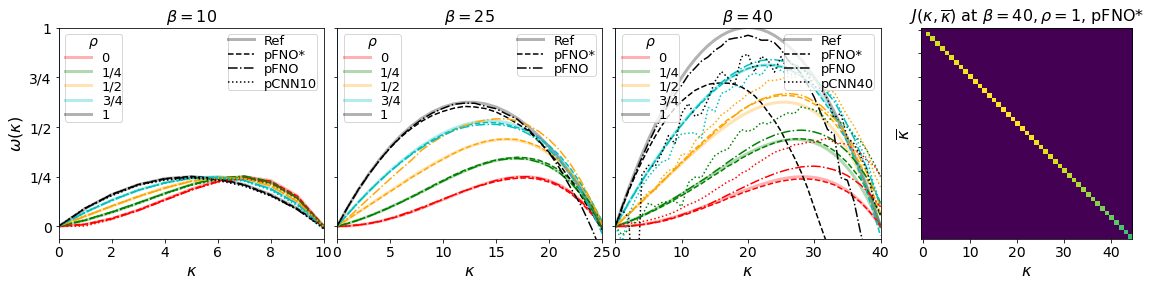

In [1387]:
cmp_plt_dispersion_relation(  all_list_model_names, disp_rel_models, disp_rel_analytical, list_Lpi, list_rho , png_filename='drel.png')


In [1388]:

def plt_operator_jacobian( all_list_model_names,  disp_rel_models,  disp_rel_analytical, list_Lpi, list_rho,png_filename):

    kk = np.arange(128+1);
    rho_colors=['r','g', 'orange', 'c' ,'k']
    model_style=['--','-.',':']
    model_name=['pFNO*','pFNO','pCNN40']

    fig, axs = plt.subplots(2,2, figsize=(8,8))

    Lpi_s=[0, 2]
    m_s  =[0, 2]
    
    for i, i_Lpi in enumerate(Lpi_s):
        for j, j_m in enumerate(m_s):
            # [idx_model,idx_Lpi,idx_rho,  :  ,  :]
            #(       3  ,   3   ,   5   , 129 , 129)
            ax = axs[i,j]   
            ax.imshow( jacobian_all[i_Lpi, j_m, -1,:50,:50 ] ) 
            
            ax.set_xlabel(r'$\kappa$', fontsize=14)
            ax.set_ylabel(r'$\kappa^*$', fontsize=14)

            ax.set_title(r'$J(\kappa,\kappa^*)$ of {}'.format(model_name[j_m]), fontsize=14)
     
    for ax in axs.flat:
        ax.label_outer()
        
    fig.tight_layout()
    plt.subplots_adjust(left=0.045, right=0.99, top=0.99, wspace=0.05)
        
        
    if png_filename is not None:
        print('save png: ',png_filename )
        plt.savefig(png_filename,dpi=300)

#plt_operator_jacobian(  all_list_model_names, disp_rel_models, disp_rel_analytical, list_Lpi, list_rho , png_filename= None)
